# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Scale - Cross Validation - Regularization(Ridge,Lasso,ElasticNet) - Gridsearch </b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Don't Forget to follow us on: </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

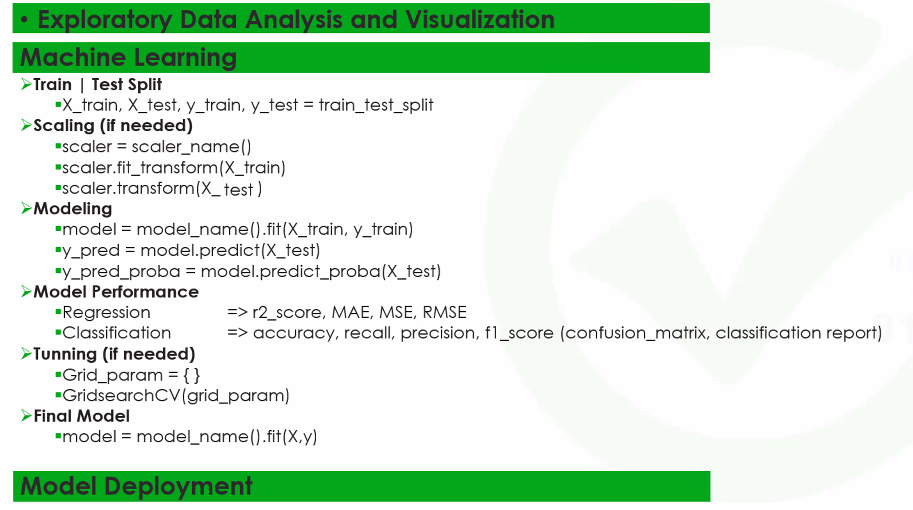

[Steps of Machine Learning](https://towardsdatascience.com/the-7-steps-of-machine-learning-2877d7e5548e)

# Import Libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop("sales", axis = 1)
# Features or Inputs
y = df['sales']
# Target variable or output

# Data Preprocessing

## Polynomial Conversion

**!!!To overfit the Data**

While explaining underfitting and overfitting, we actually created an overfitting situation with deg=5 and we will do the same again.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
polynomial_converter = PolynomialFeatures(degree= 5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [6]:
poly_features.shape

(200, 55)

In [7]:
pd.DataFrame(poly_features)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64,1.218288e+07,2001359.178,3663863.892,328776.084,601886.376,1101866.064,54010.152,98875.728,181010.592,331373.888,2.803280e+09,4.605127e+08,8.430551e+08,7.565138e+07,1.384941e+08,2.535394e+08,1.242774e+07,2.275131e+07,4.165054e+07,7.624913e+07,2.041584e+06,3.737503e+06,6.842200e+06,1.252593e+07,2.293107e+07,6.450347e+11,1.059640e+11,1.939870e+11,1.740738e+10,3.186748e+10,5.833941e+10,2.859622e+09,5.235075e+09,9.583789e+09,1.754493e+10,4.697684e+08,8.599993e+08,1.574390e+09,2.882217e+09,5.276440e+09,7.717187e+07,1.412776e+08,2.586352e+08,4.734803e+08,8.667946e+08,1.586830e+09
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01,8.812112e+04,77823.825,89309.275,68729.805,78873.135,90513.445,60698.457,69656.499,79936.593,91733.851,3.921390e+06,3.463160e+06,3.974263e+06,3.058476e+06,3.509855e+06,4.027848e+06,2.701081e+06,3.099714e+06,3.557178e+06,4.082156e+06,2.385449e+06,2.737500e+06,3.141508e+06,3.605140e+06,4.137197e+06,1.745019e+08,1.541106e+08,1.768547e+08,1.361022e+08,1.561885e+08,1.792392e+08,1.201981e+08,1.379373e+08,1.582944e+08,1.816560e+08,1.061525e+08,1.218188e+08,1.397971e+08,1.604287e+08,1.841053e+08,9.374816e+07,1.075838e+08,1.234613e+08,1.416820e+08,1.625918e+08,1.865876e+08
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49,5.088448e+03,13579.056,20501.712,36237.132,54710.964,82602.828,96702.579,146001.933,220434.291,332812.557,8.752131e+04,2.335598e+05,3.526294e+05,6.232787e+05,9.410286e+05,1.420769e+06,1.663284e+06,2.511233e+06,3.791470e+06,5.724376e+06,4.438648e+06,6.701489e+06,1.011793e+07,1.527610e+07,2.306391e+07,1.505366e+06,4.017228e+06,6.065226e+06,1.072039e+07,1.618569e+07,2.443722e+07,2.860849e+07,4.319321e+07,6.521328e+07,9.845927e+07,7.634475e+07,1.152656e+08,1.740285e+08,2.627489e+08,3.966993e+08,2.037340e+08,3.075983e+08,4.644132e+08,7.011728e+08,1.058633e+09,1.598329e+09
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25,3.477266e+06,947927.925,1342706.625,258412.035,366031.575,518470.875,70444.997,99782.865,141338.925,200201.625,5.268058e+08,1.436111e+08,2.034201e+08,3.914942e+07,5.545378e+07,7.854834e+07,1.067242e+07,1.511710e+07,2.141285e+07,3.033055e+07,2.909378e+06,4.121032e+06,5.837298e+06,8.268327e+06,1.171180e+07,7.981108e+10,2.175708e+10,3.081814e+10,5.931138e+09,8.401248e+09,1.190007e+10,1.616871e+09,2.290241e+09,3.244046e+09,4.595078e+09,4.407708e+08,6.243364e+08,8.843506e+08,1.252652e+09,1.774337e+09,1.201573e+08,1.701986e+08,2.410804e+08,3.414819e+08,4.836971e+08,6.851400e+08
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56,5.910106e+06,353037.312,1909016.576,21088.512,114034.176,616629.248,1259.712,6811.776,36834.048,199176.704,1.068547e+09,6.382915e+07,3.451502e+08,3.812803e+06,2.061738e+07,1.114866e+08,2.277559e+05,1.231569e+06,6.659596e+06,3.601115e+07,1.360489e+04,7.356718e+04,3.978077e+05,2.151108e+06,1.163192e+07,1.931933e+11,1.154031e+10,6.240316e+10,6.893548e+08,3.727622e+09,2.015677e+10,4.117827e+07,2.226677e+08,1.204055e+09,6.510816e+09,2.459764e+06,1.330095e+07,7.192364e+07,3.889204e+08,2.103051e+09,1.469328e+05,7.945256e+05,4.296323e+06,2.323197e+07,1.256247e+08,6.793041e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,141.34,527.16,13.69,51.06,190.44,5.574297e+04,5399.188,20137.512,522.958,1950.492,7274.808,50.653,188.922,704.628,2628.072,2.129381e+06,2.062490e+05,7.692530e+05,1.997700e+04,7.450879e+04,2.778977e+05,1.934945e+03,7.216820e+03,2.691679e+04,1.003924e+05,1.874161e+02,6.990114e+02,2.607124e+03,9.723866e+03,3.626739e+04,8.134237e+07,7.878711e+06,2.938546e+07,7.631212e+05,2.846236e+06,1.

In [8]:
X.shape

(200, 3)

## Train | Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Scaling the Data

[Standardization vs Normalization 1](https://www.youtube.com/watch?v=sxEqtjLC0aM&ab_channel=NormalizedNerd)

[Standardization vs Normalization 2](https://www.youtube.com/watch?v=bqhQ2LWBheQ&ab_channel=Prof.RyanAhmed)

[Preprocessing Data in Scikit-Learn](https://scikit-learn.org/stable/modules/preprocessing.html)

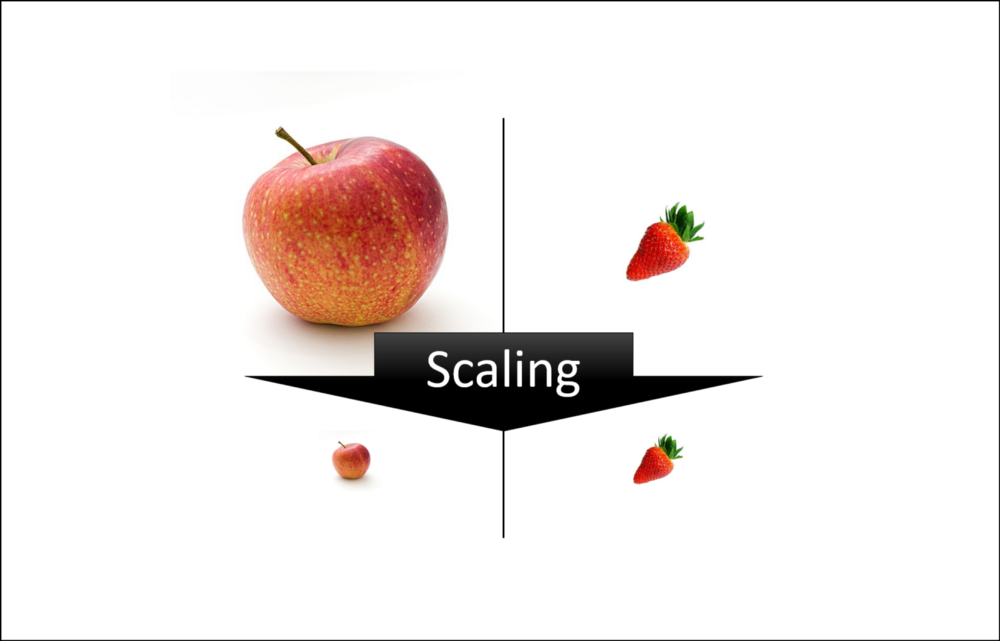

**Scaling: Fitting Our Data to the Same Ranges**

The ranges of features in a dataset can vary significantly. If we don't scale these features, those with larger ranges can be weighted more heavily, especially in distance-based models, leading to incorrect results. Scaling ensures that all features contribute equally to the model.

Advantages of Scaling:
- **Prevents incorrect weighting**: Features with large ranges won't dominate those with smaller ranges.
- **Accelerates Gradient Descent**: Helps models like linear and logistic regression converge faster.
- **Feature Importance**: Improves the accuracy in detecting important features.

There are no disadvantages to applying scaling to your data. If you're unsure whether to scale, it’s best to apply it directly.

**Data Leakage: Preventing Information Leakage Between Training and Test Sets**

Data leakage occurs when information from the test set unintentionally influences the training set, leading to overly optimistic performance estimates. 

To prevent leakage:
- Apply the **fit** operation only on the training set (X_train).
- Apply the **transform** operation on both the training set (X_train) and the test set (X_test), but never fit the test set.

Remember, the target variable is never scaled.

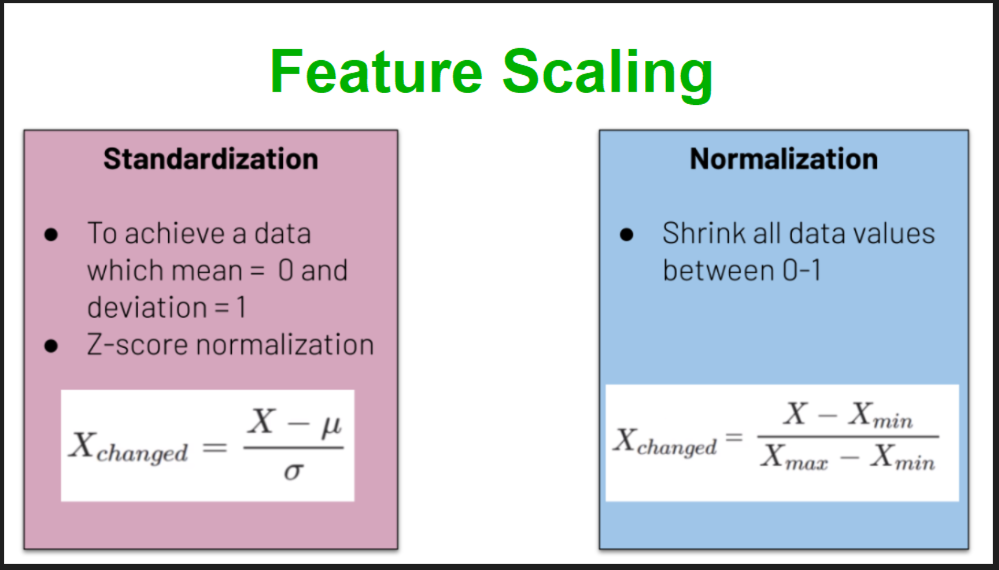

Preprocessing steps like **standardization** and **normalization** help scale the data to a certain range. These steps are commonly used when training machine learning models to avoid situations where the distribution and scale of the data could affect the model's performance.

**Standardization**

**Standardization** scales the **features** of a dataset so that they have a mean of 0 and a standard deviation of 1. This is typically done by subtracting the mean of the feature and dividing by the standard deviation. This process makes the data closer to a normal distribution. Standardization corrects the scale differences between features, which can improve the performance of algorithms such as **Linear Regression**, **Logistic Regression**, **Support Vector Machines**, and **Neural Networks**.

In standardization, we express our data in terms of **z-scores**. After this, the mean of all features will be 0 and the standard deviation will be 1. The z-score indicates how far a data point is from the mean in terms of standard deviations. The mathematical operation of the mean and standard deviation allows the z-score to take on positive or negative values. Each number on the horizontal axis corresponds to a z-score, which shows how many standard deviations an observation is from the mean (μ).

**Normalization**

**Normalization** scales the **features** of a dataset to a range between 0 and 1. This is usually done by subtracting the minimum value of the feature from the feature value and then dividing the result by the range (maximum value minus minimum value). Normalization ensures that the data fits within a specific range and is often useful for algorithms like **k-NN**, **K-Means**, and **Neural Networks**, as these algorithms are sensitive to the scales of the features.

Normalization is a commonly used step in data preparation for machine learning projects. The goal of normalization is to convert the values of numerical variables in the dataset to a common scale without distorting differences in the ranges of values. Not every dataset requires normalization; it is only necessary when there are numerical variables that are distributed over different ranges.

For example, consider a dataset with two features, **age (x1)** and **income (x2)**. Age ranges from 0–100, while income ranges from 20,000–500,000. These two features have very different ranges. When performing an analysis like **Multivariate Linear Regression**, the income variable will have a greater impact on the result due to its larger value. However, this does not mean that the income variable is a more important predictor. To prevent this, normalization is needed.

Both techniques have their applications and algorithms, and which technique to use in a given situation typically depends on the requirements of the algorithm and the distribution of the data. **For example, when the data does not follow a normal distribution, normalization is often a better choice. On the other hand, when the data is close to a normal distribution, standardization is usually preferred.**

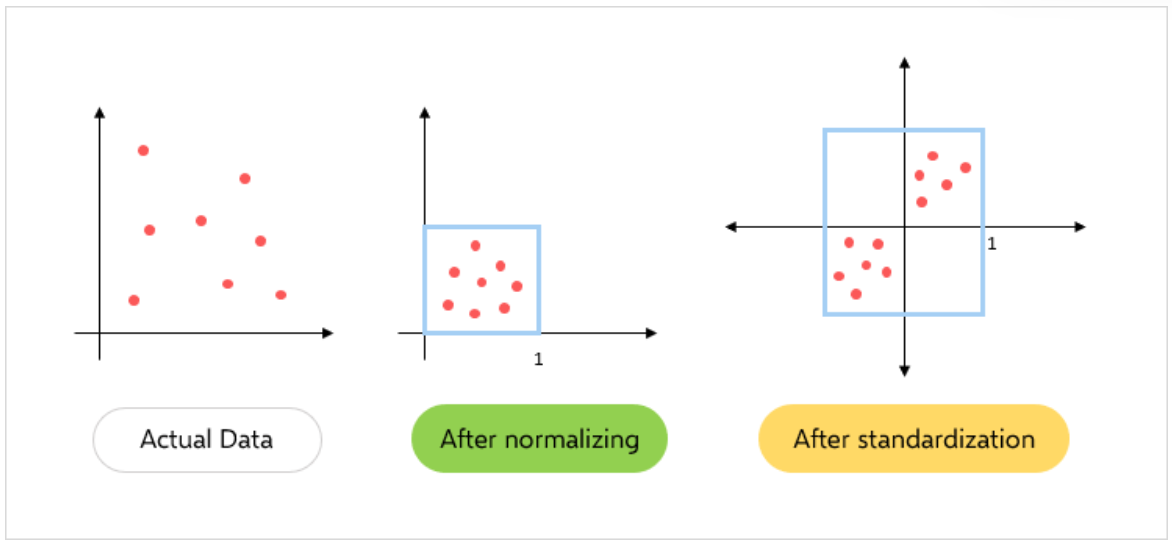

**Data Scaling and Data Leakage**

Preventing data leakage during data scaling is critically important. Therefore, specific steps must be followed carefully during the scaling process.

**Fit and Transform Processes**

- **Fit Process**: This is the step where the transformation formulas for the chosen scaling algorithm are generated. During this process, the mean and standard deviation values are calculated by iterating over the training data (**X_train**). These values are then stored in RAM and used for the transformation process.

- **Transform Process**: The data is transformed using the information obtained from the fit process. Both the training data (**X_train**) and the test data (**X_test**) are transformed using this information.

**Why Do We Only Perform the Fit Process on X_train?**

- **Data Leakage**: If the fit process is performed on the entire dataset, the model will have seen the test data, leading to data leakage. This would result in an unrealistically high model performance.
- **Correct Value Transformation**: The fit process is performed only on **X_train**, and the mean and standard deviation values obtained are used to transform both the training and test data. This ensures that the training and test data are transformed according to the same scaling criteria, preventing data leakage.

**Implementation Steps**

1. **Fit Process**: Apply the chosen scaling algorithm only on **X_train**.
   ```python
   scaler = StandardScaler()  # For example, using StandardScaler
   scaler.fit(X_train)
   ```

2. **Transform Process**: Use the parameters obtained from the fit process to transform both **X_train** and **X_test**.
   ```python
   X_train_scaled = scaler.transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   ```

These steps prevent the model from seeing the test data beforehand, thus preventing data leakage. The test data is scaled using the parameters obtained from the training data, ensuring accurate model performance evaluation.

**Why Do We Perform the Fit Process on X_train?**

- **Large Data Coverage**: **X_train** typically contains a large portion of the dataset, thus accurately reflecting the general characteristics of the data.
- **Z-Score Consistency**: The z-scores obtained from fitting on **X_train** allow us to use the same transformation criteria on the test data. This ensures consistency between the distributions seen during training and testing.

**Summary**

To prevent data leakage and accurately evaluate model performance, the fit process should only be performed on the training data. Then, both the training and test data should be transformed using the obtained parameters. This prevents the model from seeing the test data and ensures realistic performance evaluation.

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# StandardScaler --> Standardization
# MinMaxScaler --> Normalization

In [12]:
scaler = StandardScaler()

**Model Fit & Scale**

The fit is applied to the training dataset, which makes up the bulk of the dataset, because the parameters and data distribution that the model needs to learn are usually found in the training dataset. The training dataset is the dataset used to learn the behavior of the model.

Once the scaling process is fit to the training dataset, both the training dataset and the test dataset are scaled using the parameters obtained from this fit process. In this way, the test dataset is prevented from accessing information about the data, thus preventing data leakage.

The reason for not fitting on X_test is that the model should not see the test dataset, thus preventing data leakage so that it can better generalize to real-world data. If the model sees the test dataset, it could lead to misleadingly improved performance metrics.

In summary, fitting is only done on the training data set because the model uses the training data set to learn its behavior. After fitting the training dataset, the scaling process scales the training and test datasets with the parameters obtained from this fitting process. This prevents information leakage and allows the model to generalize better to real-world data.

In [13]:
scaler.fit(X_train)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [14]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled
# the values are centered around zero, while zero is the mean or average, with 1 standard deviation

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]], shape=(140, 55))

**Model Training and Scaling**

The scaling operations you apply when training and testing your model are directly related to how your model will be run on real-world data. The bottom line is this:

**Scaling During Model Training**

During the training of your model, you apply scaling on your training dataset. This helps the model to better understand and adapt to scale differences between features in the dataset. The scaling parameters you calculate at this stage (e.g. minimum-maximum values or mean and standard deviation) should be stored.

**Scaling During Model Testing**

You need to apply the same scaling process on the test data set that you will use to test your model. However, it is important to scale your test dataset using the scaling parameters calculated for your training dataset. This ensures that the model sees the same feature distributions during testing that it learned during training, which is important for the model to be able to generalize to real-world data.

**End User Data**

When using your model in real-world applications, end users will input raw data. In order for this data to be processed correctly by the model, you need to apply the same scaling operations to this raw data that you used during the training phase of your model. That is, when running your model on real-world data, you need to pre-process the data received from the end-user using the same scaling parameters used during training to scale it.

Therefore, scaling the test data is actually a simulation of how the model will be used on real-world data. This process is necessary to ensure that your model is tested on data as close as possible to the feature distributions it learned during training. When running the model on end-user data, applying the same scaling process is vital to maintain the accuracy and generalizability of the model.


In [15]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]], shape=(60, 55))

In [16]:
pd.DataFrame(X_train_scaled).agg(['mean', 'std']).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [17]:
pd.DataFrame(X_test_scaled).agg(['mean', 'std']).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


# Linear Regression
Now I select Linear Regression Model, and apply it over the scaled data.

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train_scaled, y_train)
# fit only on the training data

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
# prediction with both training and test data
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [23]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
ls
# ls for linear score

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


## Multicollinearity

[Multicollinearity 1](https://www.youtube.com/watch?v=G1WX5GiFSWQ&ab_channel=DATAtab)

[Multicollinearity 2](https://www.youtube.com/watch?v=ekuD8JUdL6M&ab_channel=UnfoldDataScience)
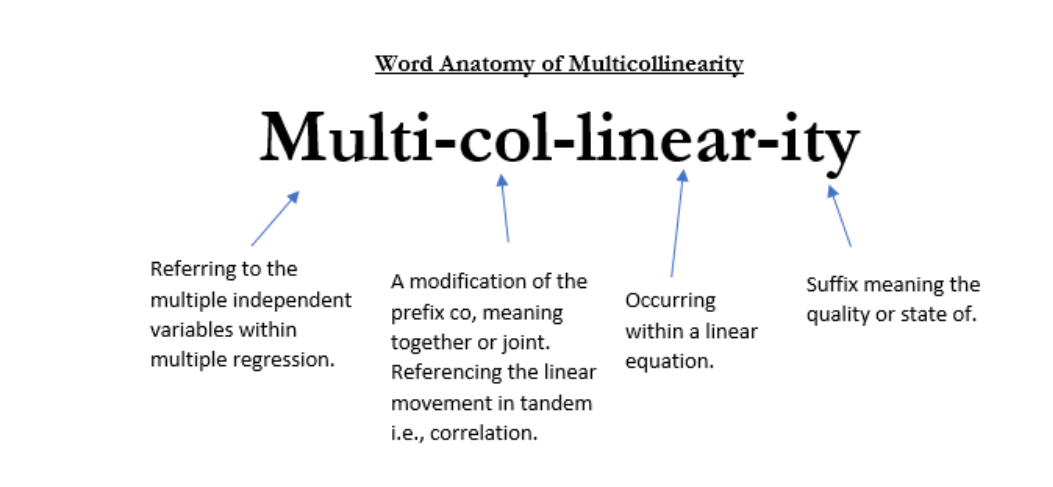

**Multicollinearity**

**Multicollinearity** occurs when independent variables (features) in a regression model are highly linearly related. This can create significant issues in regression analysis and reduce the reliability of the model. When multicollinearity is present, it becomes difficult to distinguish the effects of individual independent variables, and the predictive performance of the model may suffer.

**Causes**:
- Presence of highly similar independent variables in the dataset.
- Including a large number of independent variables in the model.
- Seasonal or trend components in time series data.

**Effects**:
- Regression coefficients become unreliable.
- The model's ability to generalize decreases.
- Standard errors increase, and confidence intervals widen.

**Indicators**:
- High correlation coefficients between independent variables.
- High VIF (Variance Inflation Factor) values (typically above 10).
- High R-squared value but high p-values for individual independent variables.

**Solutions**:
1. **Removing Variables**: Eliminate some of the highly correlated variables from the model.
2. **Principal Component Analysis (PCA)**: Reduce the data to fewer, independent components.
3. **Ridge or Lasso Regression**: Use penalization methods in regression models to reduce multicollinearity.

In [24]:
def color_red(val):
    if val > 0.90 and val < 1:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'white'
    return f'color:{color}'

In [25]:
pd.DataFrame(poly_features).corr().style.map(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

## Cross Validation

[Cross Validation](https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer)

[Cross-Validate Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

[KFold in Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

[StratifiedKFold in Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

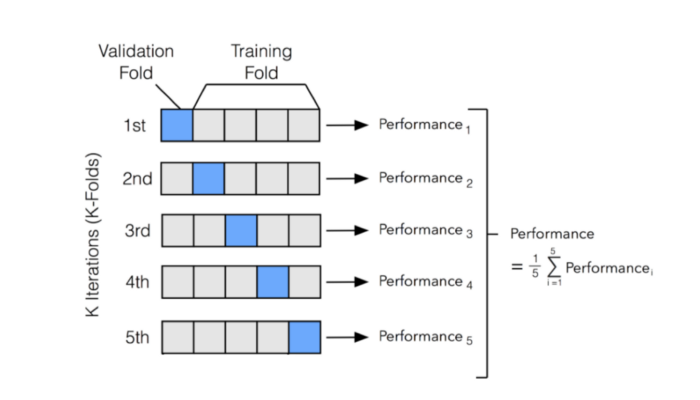
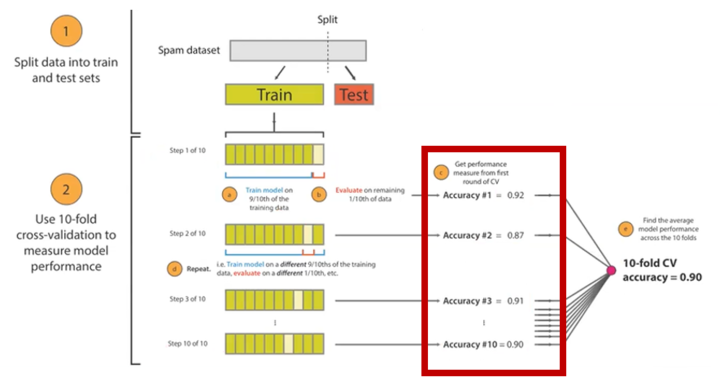

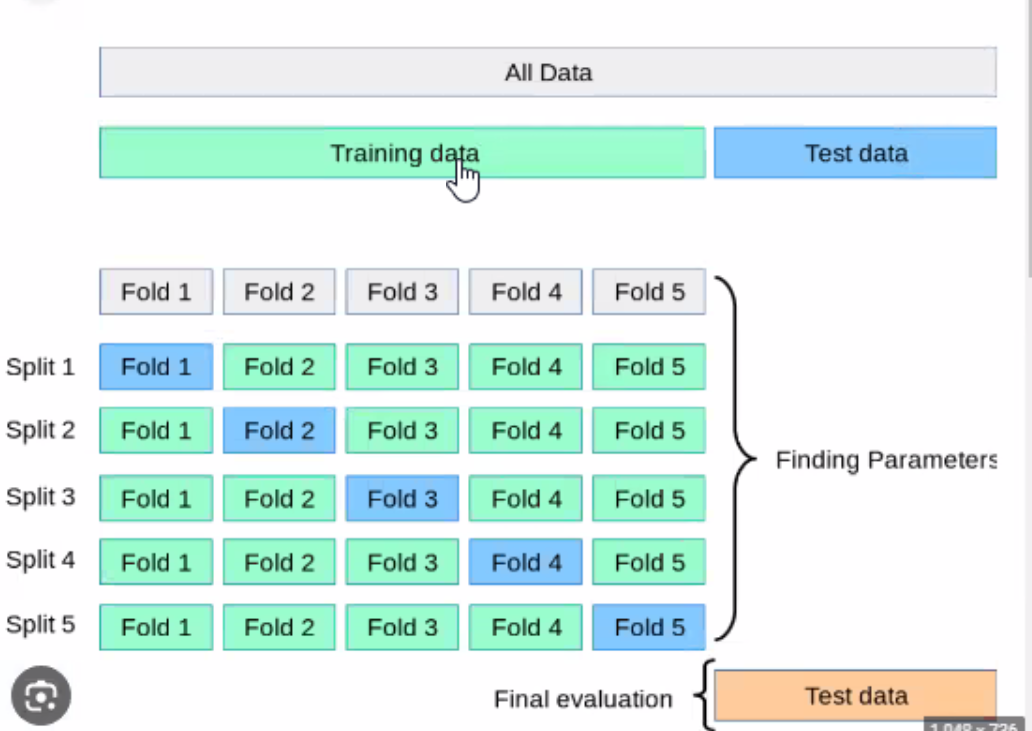

**Cross-validation**

**Cross-validation** is a technique used to measure the generalization ability of a model and prevent overfitting. 

This method provides a more accurate estimate of the model's performance on real-world data. 

The most commonly used type of cross-validation is **k-fold cross validation**. Here are the steps of this method:

1. **Splitting the Dataset**: The dataset is randomly divided into "k" equal-sized subsets (folds). Typically, k = 5 or 10 is chosen, but this may vary depending on the problem and the size of the dataset.
2. **Training and Testing**: The model is trained on k-1 folds and tested on the remaining fold. This process is repeated for each fold, meaning each fold is used exactly once as the test set. This is why it's called "k-fold."
3. **Performance Measurement**: In each iteration, the model's performance (e.g., accuracy, recall, F1 score, etc.) is measured. These measurements are used to estimate the model's overall performance.
4. **Average Performance**: Finally, the performance metrics from all k iterations are averaged. This provides an estimate of the model's generalization performance.


**How Cross Validation Works**

1. **Shuffling the Dataset**: Randomly shuffle the dataset.
2. **Splitting the Dataset**: Divide the data into K folds (e.g., K=5 or K=10).
3. **Setting Aside the Test Fold**: Set aside one fold for testing and use the remaining K-1 folds for training.
4. **Training and Testing the Model**: Train the model with the K-1 folds (fit) and test it on the single fold set aside.
5. **Repeating the Process**: Repeat the process with a different fold as the test set each time.
6. **Different Train-Test Sets**: In each iteration, use different train-test data.
7. **Averaging the Results**: After performing this process for each of the K folds, we obtain K loss results. Average these results to find the mean loss value.

In [26]:
from sklearn.model_selection import cross_validate, cross_val_score

In [27]:
# sklearn.metrics.get_scorer_names()

In [28]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 'neg_mean_absolute_error',
                                                       'neg_mean_squared_error', 'neg_root_mean_squared_error'],
              cv = 10, return_train_score=True)

In [29]:
cv_results_df = pd.DataFrame(scores, index=range(1, 11)).add_prefix('cv_')
cv_results_df

,cv_fit_time,cv_score_time,cv_test_r2,cv_train_r2,cv_test_neg_mean_absolute_error,cv_train_neg_mean_absolute_error,cv_test_neg_mean_squared_error,cv_train_neg_mean_squared_error,cv_test_neg_root_mean_squared_error,cv_train_neg_root_mean_squared_error
1,0.001491,0.000813,-0.280734,0.998028,-1.994430,-0.170883,-31.328119,-0.051993,-5.597153,-0.228021
2,0.000951,0.000709,0.993019,0.997754,-0.377066,-0.182352,-0.250648,-0.056709,-0.500647,-0.238136
3,0.000746,0.000542,0.983934,0.997959,-0.392312,-0.175849,-0.306241,-0.055228,-0.553391,-0.235007
4,0.000673,0.000528,0.825272,0.997673,-0.979767,-0.185736,-4.402358,-0.061429,-2.098180,-0.247848
5,0.000702,0.000556,0.991181,0.997684,-0.322253,-0.186151,-0.166869,-0.060162,-0.408496,-0.245279
6,0.000695,0.000543,0.969012,0.997917,-0.484493,-0.174265,-0.976815,-0.053603,-0.988339,-0.231524
7,0.000786,0.000587,0.992885,0.997835,-0.327955,-0.180877,-0.144808,-0.058398,-0.380536,-0.241657
8,0.000667,0.000503,0.990130,0.997602,-0.447015,-0.181987,-0.332058,-0.060747,-0.576244,-0.246468
9,0.000646,0.000500,0.965508,0.997951,-0.465024,-0.175463,-0.528863,-0.055042,-0.727230,-0.234610
10,0.000632,0.000523,0.990123,0.997564,-0.324433,-0.194906,-0.197801,-0.065733,-0.444748,-0.256384


In [30]:
cv_results_df.iloc[:, 2:].mean()

cv_test_r2                              0.842033
cv_train_r2                             0.997797
cv_test_neg_mean_absolute_error        -0.611475
cv_train_neg_mean_absolute_error       -0.180847
cv_test_neg_mean_squared_error         -3.863458
cv_train_neg_mean_squared_error        -0.057904
cv_test_neg_root_mean_squared_error    -1.227496
cv_train_neg_root_mean_squared_error   -0.240493
dtype: float64

In [31]:
ls

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


In [32]:
model = LinearRegression()
scores2 = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 'neg_mean_absolute_error',
                                                       'neg_mean_squared_error', 'neg_root_mean_squared_error'],
              cv = 5, return_train_score=True)

In [33]:
cv_results_df2 = pd.DataFrame(scores2, index=range(1, 6)).add_prefix('cv_')
cv_results_df2

,cv_fit_time,cv_score_time,cv_test_r2,cv_train_r2,cv_test_neg_mean_absolute_error,cv_train_neg_mean_absolute_error,cv_test_neg_mean_squared_error,cv_train_neg_mean_squared_error,cv_test_neg_root_mean_squared_error,cv_train_neg_root_mean_squared_error
1,0.001300,0.000699,0.367902,0.998139,-1.271247,-0.160079,-19.204259,-0.046812,-4.382266,-0.216360
2,0.001119,0.000697,0.879658,0.998088,-0.710463,-0.169729,-2.713292,-0.052109,-1.647207,-0.228273
3,0.001265,0.000661,0.977560,0.997998,-0.395033,-0.169316,-0.622901,-0.050592,-0.789240,-0.224927
4,0.000677,0.000555,0.989369,0.997877,-0.418977,-0.171708,-0.289361,-0.055062,-0.537923,-0.234652
5,0.000640,0.000529,0.166596,0.998118,-1.474093,-0.167283,-15.409856,-0.052013,-3.925539,-0.228063


In [34]:
cv_results_df.iloc[:, 2:].mean()
# after 10cv

cv_test_r2                              0.842033
cv_train_r2                             0.997797
cv_test_neg_mean_absolute_error        -0.611475
cv_train_neg_mean_absolute_error       -0.180847
cv_test_neg_mean_squared_error         -3.863458
cv_train_neg_mean_squared_error        -0.057904
cv_test_neg_root_mean_squared_error    -1.227496
cv_train_neg_root_mean_squared_error   -0.240493
dtype: float64

In [35]:
cv_results_df2.iloc[:, 2:].mean()
# after 5 cv

cv_test_r2                              0.676217
cv_train_r2                             0.998044
cv_test_neg_mean_absolute_error        -0.853963
cv_train_neg_mean_absolute_error       -0.167623
cv_test_neg_mean_squared_error         -7.647934
cv_train_neg_mean_squared_error        -0.051317
cv_test_neg_root_mean_squared_error    -2.256435
cv_train_neg_root_mean_squared_error   -0.226455
dtype: float64

In [36]:
ls

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


**Note for Underfitting Overfitting**

If the test score and the cross-validation (CV) score are similar, but the train score is different, this usually indicates that the model tends to generalize well. In this scenario, the performance on the train dataset (train score) may be lower than the performance on the test dataset (test score), but when the cross-validation score and the test score are close, we can consider that the model has a good generalization ability.

**This type of scenario may reflect the following situations**:

- **Model's Generalization Ability**: The model may have fit the training dataset well, but this fit is not poorly reflected in the test dataset. However, cross-validation shows that the model performs well on different subsets of data, indicating that the model has generalizability.

- **Data Distribution Similarity**: The test dataset and the cross-validation dataset may have a similar distribution to the training dataset, which may result in similar test and cross-validation scores.

- **Scaling and Preprocessing**: The test dataset and the cross-validation data may have gone through the same scaling and preprocessing steps, which may lead to similar scores.

In this scenario, what is fundamentally important is the **generalization ability of the model.** How the model performs against new and unseen data is important, and **if the cross-validation score and the test score are similar, the model is more likely to generalize better to this new data.** A high train score indicates that the model fits the training dataset, but the test and cross-validation scores indicate that the model achieves this fit without overfitting.



In [37]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [38]:
lm_coef_df = pd.DataFrame(lm.coef_, columns=['lm_coefficients'])
lm_coef_df

,lm_coefficients
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


# Regularization

[Regularization 1](https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer)

[Regularization 2](https://www.youtube.com/watch?v=1dKRdX9bfIo&ab_channel=StatQuestwithJoshStarmer)

[Regularization 3](https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer)

[Regularization 4](https://www.youtube.com/watch?v=VqKq78PVO9g&ab_channel=codebasics)

[Ridge Regression in Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

[Lasso Regression in Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

[ElasticNet Regression in Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

**Regularization: Preventing Overfitting**

Linear Models (Linear Regression, Support Vector Machine, etc.) are among the most commonly used Machine Learning algorithms. However, they have a significant drawback: they are very prone to **overfitting**.

**The Basics of Linear Models**

In the simplest form, as seen in a 2D plane, they try to find the best fitting line (or curve) to the data points. The formula is very straightforward:

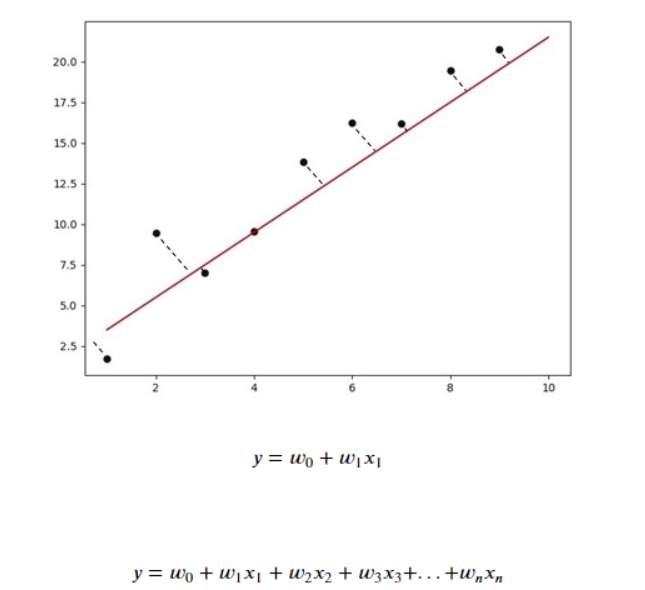

However, as the number of variables increases, the coefficients, i.e., \( w \) values, begin to grow (in both positive and negative directions). With sufficiently large \( w \) values, you can predict almost anything. This is exactly where **overfitting** starts.

**What is Overfitting?**

Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations in the data, which leads to poor performance on new, unseen data. The model becomes overly complex and fails to generalize to new data.

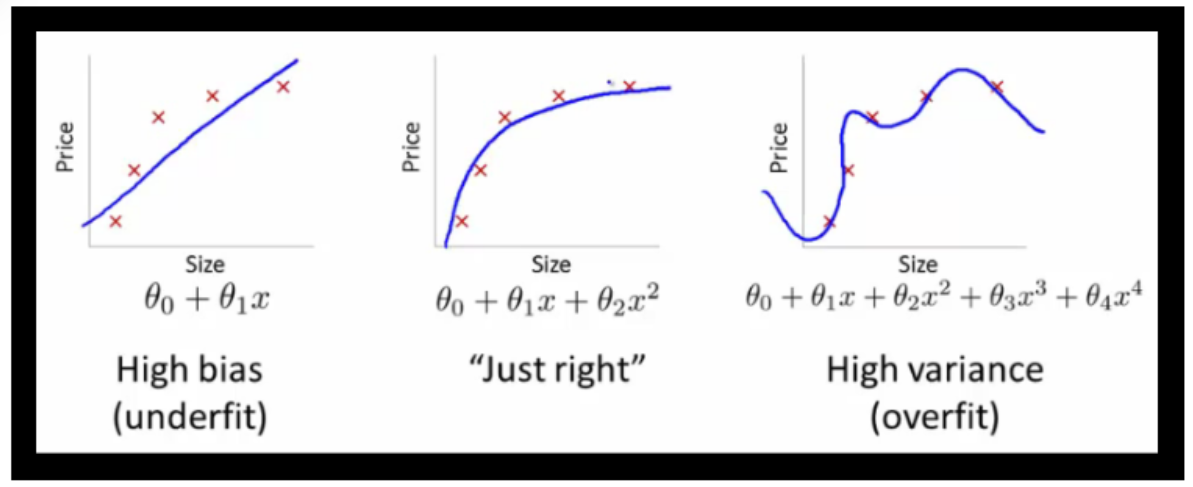

**Preventing Overfitting with Regularization**

This problem can be solved with **Regularization**. While performing OLS (Ordinary Least Squares), the model tries to minimize the(training)error by increasing the coefficients in both positive and negative directions. Regularization penalizes the model for increasing the coefficients, thereby preventing the model from making them too large.

**Our New Loss Function with Regularization**

With Regularization, our new loss function becomes:

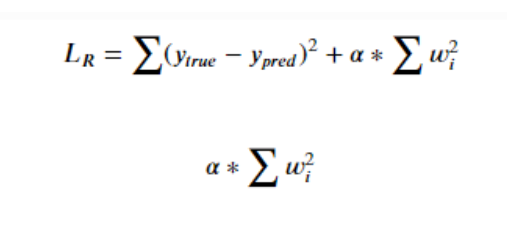

**How to Apply Regularization?**

The \( w \) values mentioned above are actually parameters set within the model. However, \(\alpha\) is a hyperparameter, and we control the intensity of Regularization by setting it.

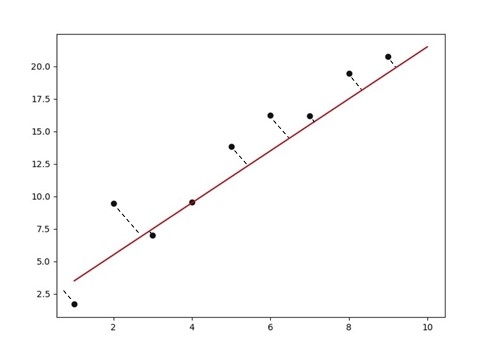

## Ridge Regression

**When and Why to Use Ridge and Lasso Regression**

Ridge and Lasso regressions are regularization versions of linear regression. This regularization makes the model more robust against overfitting and can sometimes improve the model's overall performance.

1. **Preventing Overfitting**:

   - **Ridge (L2 Regularization)**:
   
       - Adds the sum of the squared coefficients as a penalty to shrink the model's coefficients.
       
       - This reduces the complexity of the model and helps prevent overfitting.
   
       - It is called L2 regularization because it takes the square (2) of the coefficients.

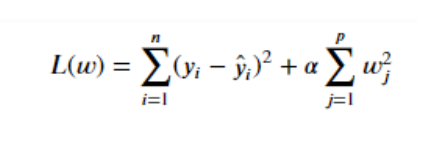
   - **Lasso (L1 Regularization)**:
   
       - Adds the sum of the absolute values of the coefficients as a penalty to shrink the coefficients toward zero.
       
       - This can lead to some coefficients being exactly zero, effectively performing feature selection and reducing model complexity.
       
       - It is called L1 regularization because it takes the first power (1) of the coefficients.
   
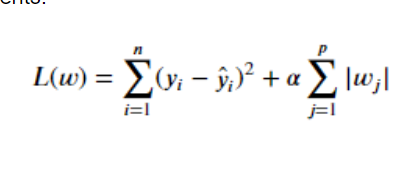

   - **Elastic Net**:
   
       - Combines L1 and L2 regularization.
   
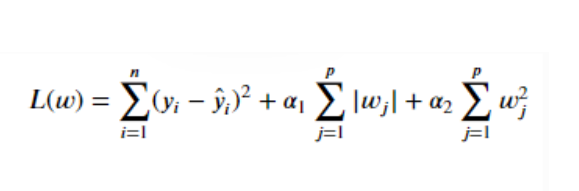

2. **Feature Selection**:
   - Lasso regression can drive some coefficients to exactly zero, effectively removing non-informative features from the model. This is also known as feature selection and is very useful in high-dimensional datasets.

3. **Multicollinearity**:
   - If there is high correlation (multicollinearity) among features in a dataset, this can destabilize the coefficients of linear regression. Ridge and Lasso can stabilize the coefficients in such situations.

4. **Model Interpretability**:
   - Lasso can enhance model interpretability by including only the most significant features. Ridge also makes the impact of features more understandable by shrinking the coefficients.

In conclusion, **Ridge and Lasso regressions** help overcome some limitations of linear regression, allowing us to build more generalizable and stable models. The choice between the two methods depends on the dataset, problem definition, and the desired flexibility of the model. Approaches like **Elastic Net** can be used to balance the benefits of both regularization techniques.

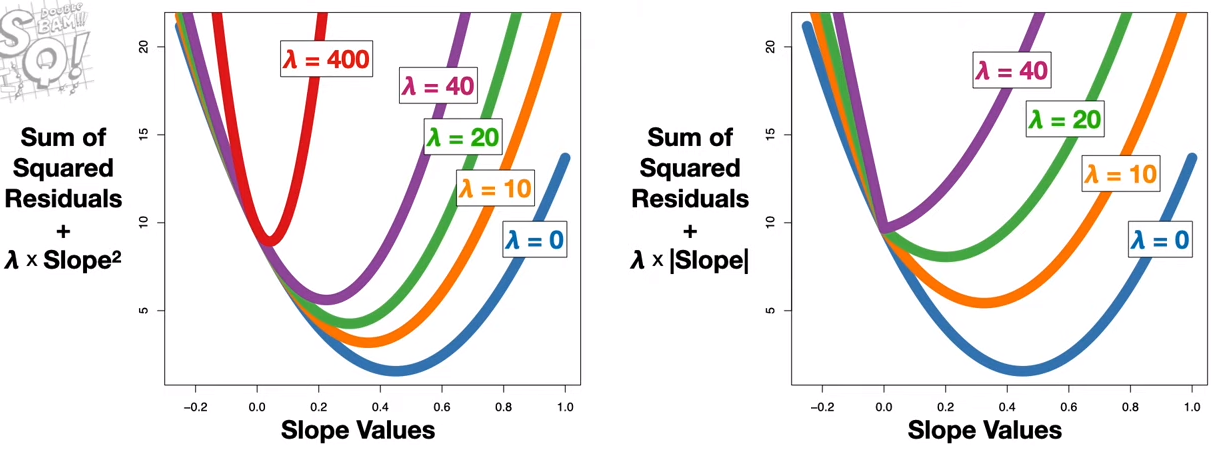

In [39]:
from sklearn.linear_model import Ridge

In [40]:
# amount of error is decided by alpha value
ridge_model = Ridge(alpha = 1)
# the default value

In [41]:
ridge_model.fit(X_train_scaled, y_train)

# we train the model on scaled training data
# The data we will train using ridge.regression model must be scaled
# This process addresses both the multicollinearity problem by weightiing all features equally by the model
# cal also group featues as important and unimportant.

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [42]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [43]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [44]:
pd.concat([ls, rs], axis=1)
# test data has improved with ridge regression
# we also saved from overfitting

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997607,0.764990,0.988677,0.982511
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
rmse,0.250934,2.575820,0.545866,0.702669


### For Ridge Regression CV (Cross Validation) with alpha : 1

In [45]:
model_ridge = Ridge(alpha=1)
scores = cross_validate(model_ridge, X_train_scaled, y_train, scoring=['r2', 
                                                                      'neg_mean_absolute_error',
                                                                      'neg_mean_squared_error', 
                                                                      'neg_root_mean_squared_error'
                                                                      ], cv = 10, return_train_score=True)

In [46]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.000942,0.000697,0.989194,0.987941,-0.430312,-0.344561,-0.264330,-0.317913,-0.514130,-0.563838
2,0.001039,0.000701,0.988294,0.988010,-0.399467,-0.332755,-0.420281,-0.302668,-0.648291,-0.550152
3,0.000505,0.000564,0.980399,0.988578,-0.419370,-0.351819,-0.373627,-0.309121,-0.611250,-0.555987
4,0.000424,0.000523,0.965854,0.988579,-0.656779,-0.330212,-0.860334,-0.301454,-0.927542,-0.549048
5,0.000397,0.000526,0.991450,0.987655,-0.343240,-0.349061,-0.161785,-0.320673,-0.402224,-0.566280
6,0.000385,0.000532,0.919753,0.992534,-0.723583,-0.317275,-2.529543,-0.192141,-1.590454,-0.438339
7,0.000393,0.000527,0.993011,0.988278,-0.290596,-0.344936,-0.142237,-0.316165,-0.377144,-0.562285
8,0.000398,0.000547,0.990300,0.987434,-0.434471,-0.334070,-0.326317,-0.318372,-0.571241,-0.564245
9,0.000381,0.000509,0.975828,0.989074,-0.443009,-0.345216,-0.370636,-0.293513,-0.608799,-0.541768
10,0.000380,0.000511,0.991642,0.987902,-0.269488,-0.349557,-0.167392,-0.326395,-0.409136,-0.571310


In [47]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                              0.978573
train_r2                             0.988599
test_neg_mean_absolute_error        -0.441032
train_neg_mean_absolute_error       -0.339946
test_neg_mean_squared_error         -0.561648
train_neg_mean_squared_error        -0.299841
test_neg_root_mean_squared_error    -0.666021
train_neg_root_mean_squared_error   -0.546325
dtype: float64

In [48]:
train_val(y_train, y_train_pred, y_test, y_pred, 'ridge')

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [49]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [50]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ['ridge_coef_1'])
rm_df

,ridge_coef_1
0,3.428822
1,0.689086
2,0.170305
3,-0.910850
4,2.723077
5,0.112909
6,-0.404686
7,0.287950
8,-0.091937
9,-1.014535


In [51]:
pd.concat([lm_coef_df, rm_df], axis=1)

,lm_coefficients,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


### Choosing best alpha value with GridSearch(CV) for (Rigde)

**GridSearchCV Hyperparameters**

[GridSearchCV Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

```python
class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
    
---

**Purpose of GridSearchCV**

- **Hyperparameter Optimization**: GridSearchCV is used to find the best hyperparameter combinations to maximize the performance of a machine learning model.
- **Exhaustive Search**: When there are multiple hyperparameters, GridSearchCV tries all possible combinations of hyperparameters to find the one that gives the best result.

**How GridSearchCV Works**

1. **Defining the Parameter Grid**: The user defines various hyperparameters and a list of values to be tested for each parameter (parameter grid).
2. **Search and Evaluation**: GridSearchCV trains the model using each combination in the parameter grid and evaluates the model's performance using cross-validation for each combination.
3. **Finding the Best Combination**: From all the combinations, the one that maximizes the model's performance is selected.
4. **Training the Final Model**: The final model is trained with the selected best hyperparameters. As a result, the model obtained from GridSearchCV is trained with these optimal hyperparameters.

**Summary**

GridSearchCV is a hyperparameter optimization tool used to maximize the performance of a machine learning model. By systematically trying all possible hyperparameter combinations, it identifies the best combination and trains the final model with it. This process is critical to ensuring that the model makes more effective and accurate predictions.

**Parameter vs. Hyperparameter**

**Parameter**

- Also known as model parameters.
- Values learned from the data during the training process.
- Typically not manually set by the user.
- **Examples**:
    - **Linear Regression**: Weights $\beta_0$ and $\beta_1$
    - **Artificial Neural Networks**: Weights $w$
    - **Decision Trees**: Split points

**Hyperparameter**

- Hyperparameters are external configuration parameters set before the training process that control the training process itself.
- Not learned from the data; instead, they are manually set or optimized through automated hyperparameter optimization techniques.
- Manually set by the user or optimized using techniques such as grid search.
- **Examples**:
    - **KNN**: The value of K
    - **Regularization**: The value of C


**Hyperparameters of Ridge Regression:**

1. **fit_intercept (True/False)**:
   - If True, the model is fit with an intercept term.
   - If False, no intercept term is used, and the model assumes the data is centered.

2. **normalize (True/False/'deprecated')**:
   - If True, the independent variables are normalized (mean 0 and variance 1) before regression.
   - This parameter has been deprecated in versions of scikit-learn 0.24 and later. It is recommended to use StandardScaler to normalize the data before fitting the model.

3. **copy_X (True/False)**:
   - If True, a copy of the independent variables is made, leaving the original data unchanged.
   - If False, the function can operate on the original data.

4. **max_iter (int or None)**:
   - The maximum number of iterations the solver can perform.
   - This parameter is relevant for certain solvers like 'sag' and 'saga'.

5. **tol (float)**:
   - The tolerance for the optimization to decide when to stop. A smaller value will lead to a more precise solution.

6. **solver ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga')**:
   - Specifies the solver to be used for Ridge regression.
   - The 'auto' option automatically selects the best solver based on the data.

7. **positive (True/False)**:
   - If True, forces the coefficients to be positive.

8. **random_state (int, RandomState instance, or None)**:
   - If an integer is chosen, it sets the seed for random number generation, ensuring reproducible results.
   - If None, different random numbers are generated each time the function is run.

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space
# value of alpha cannot be zero because it will be same as linear regression

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [54]:
ridge_model = Ridge()

In [55]:
grid_parameter = {"alpha":alpha_space}

In [56]:
grid_ridge = GridSearchCV(estimator=ridge_model, param_grid=grid_parameter, scoring='neg_root_mean_squared_error',
                         cv = 10, verbose=3, return_train_score=True)

# If we want to improve the scores of the ridge ML model according to which metric we want to improve the scores of the ridge ML model 
# we write our metric. We can write a single metric. Default value is R2_scor.

# GridsearcCV separately for all values in the hyperparameter space to maximize the metric we want 
# takes scores from different regions of the data (based on the number we specified in cv) and calculates their average. 
# Returns the hyperparameter value(s) with the highest average.

# default cv value is 5.

# Since GrdiseachCV also performs Cross Validation, in order to get the validation and train set scores
# return_train_score=True (scoring only returns the metric score we wrote against it)

In [57]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END .alpha=0.01;, score=(train=-0.366, test=-0.483) total time=   0.0s
[CV 2/10] END .alpha=0.01;, score=(train=-0.345, test=-0.573) total time=   0.0s
[CV 3/10] END .alpha=0.01;, score=(train=-0.358, test=-0.663) total time=   0.0s
[CV 4/10] END .alpha=0.01;, score=(train=-0.368, test=-0.570) total time=   0.0s
[CV 5/10] END .alpha=0.01;, score=(train=-0.366, test=-0.378) total time=   0.0s
[CV 6/10] END .alpha=0.01;, score=(train=-0.274, test=-1.262) total time=   0.0s
[CV 7/10] END .alpha=0.01;, score=(train=-0.367, test=-0.331) total time=   0.0s
[CV 8/10] END .alpha=0.01;, score=(train=-0.368, test=-0.325) total time=   0.0s
[CV 9/10] END .alpha=0.01;, score=(train=-0.333, test=-0.735) total time=   0.0s
[CV 10/10] END alpha=0.01;, score=(train=-0.371, test=-0.545) total time=   0.0s
[CV 1/10] END .alpha=0.02;, score=(train=-0.388, test=-0.460) total time=   0.0s
[CV 2/10] END .alpha=0.02;, score=(train=-0.

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Ridge()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'alpha': array([0.01, ... 1. ])}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",10
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candid

In [58]:
grid_ridge.best_params_

{'alpha': np.float64(0.02)}

In [59]:
df_grid_ridge = pd.DataFrame(grid_ridge.cv_results_)
df_grid_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000509,0.000260,0.000177,0.000039,0.01,{'alpha': 0.01},-0.483099,-0.573140,-0.662998,-0.570154,-0.378272,-1.262311,-0.331072,-0.324546,-0.735112,-0.545124,-0.586583,0.259756,3,-0.366068,-0.344533,-0.358379,-0.367921,-0.365789,-0.273821,-0.366794,-0.367887,-0.333155,-0.371309,-0.351565,0.028368
1,0.000396,0.000058,0.000174,0.000056,0.02,{'alpha': 0.02},-0.459982,-0.585564,-0.679165,-0.491259,-0.379120,-1.279917,-0.349254,-0.344955,-0.728592,-0.385928,-0.568374,0.270049,1,-0.387516,-0.367130,-0.380186,-0.390567,-0.388323,-0.288794,-0.389428,-0.391929,-0.353711,-0.394658,-0.373224,0.030659
2,0.000459,0.000066,0.000190,0.000038,0.03,{'alpha': 0.03},-0.448626,-0.591197,-0.683641,-0.652494,-0.376404,-1.289903,-0.362661,-0.361567,-0.726250,-0.316422,-0.580916,0.276514,2,-0.401254,-0.381141,-0.393969,-0.404477,-0.403007,-0.299237,-0.403245,-0.406458,-0.367145,-0.409564,-0.386950,0.031774
3,0.000381,0.000017,0.000158,0.000008,0.04,{'alpha': 0.04},-0.440734,-0.593843,-0.684024,-0.804063,-0.374083,-1.297111,-0.372390,-0.373698,-0.724333,-0.279355,-0.594363,0.288458,4,-0.411467,-0.391366,-0.404004,-0.414236,-0.413850,-0.307017,-0.413109,-0.416729,-0.377152,-0.420434,-0.396936,0.032496
4,0.000383,0.000025,0.000154,0.000005,0.05,{'alpha': 0.05},-0.434872,-0.595071,-0.682619,-0.921712,-0.372465,-1.303041,-0.379618,-0.382858,-0.722420,-0.257836,-0.605251,0.301854,5,-0.419604,-0.399439,-0.411857,-0.421592,-0.422373,-0.313121,-0.420729,-0.424613,-0.385126,-0.428924,-0.404738,0.033029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000363,0.000023,0.000152,0.000013,0.96,{'alpha': 0.9600000000000001},-0.509989,-0.645028,-0.611215,-0.943567,-0.400877,-1.582123,-0.377338,-0.565322,-0.611315,-0.403802,-0.665058,0.343451,96,-0.560229,-0.546313,-0.552231,-0.545298,-0.562591,-0.434831,-0.558403,-0.560577,-0.537614,-0.567691,-0.542578,0.036967
96,0.000353,0.000006,0.000147,0.000002,0.97,{'alpha': 0.97},-0.511032,-0.645844,-0.611219,-0.939496,-0.401215,-1.584227,-0.377280,-0.566811,-0.610675,-0.405147,-0.665295,0.343478,97,-0.561136,-0.547279,-0.553176,-0.546240,-0.563518,-0.435715,-0.559379,-0.561500,-0.538659,-0.568601,-0.543520,0.036979
97,0.000398,0.000095,0.000165,0.000036,0.98,{'alpha': 0.98},-0.512070,-0.646660,-0.611226,-0.935469,-0.401552,-1.586317,-0.377229,-0.568294,-0.610043,-0.406484,-0.665534,0.343513,98,-0.562040,-0.548241,-0.554116,-0.547179,-0.564442,-0.436594,-0.560352,-0.562418,-0.539699,-0.569507,-0.544459,0.036991
98,0.000381,0.000054,0.000166,0.000049,0.99,{'alpha': 0.99},-0.513102,-0.647476,-0.611236,-0.931484,-0.401889,-1.588392,-0.377183,-0.569771,-0.609417,-0.407813,-0.665776,0.343555,99,-0.562941,-0.549199,-0.555053,-0.548115,-0.565363,-0.437469,-0.561320,-0.563333,-0.540736,-0.570410,-0.545394,0.037004


In [60]:
grid_ridge.best_index_

np.int64(1)

In [61]:
pd.DataFrame(grid_ridge.cv_results_).loc[1, ['mean_test_score', 'mean_train_score']]

# overfitig by pulling and comparing "mean_test_score" and "mean_train_score" from the best index of the related df,
# underfiting is evaluated. 

# Since GridsearchCV also performs Cross validation, we do not need to do extra cross validation.

# The scores we get here are the scores of the scoring metric we give into gridsearchcv.

mean_test_score    -0.568374
mean_train_score   -0.373224
Name: 1, dtype: float64

In [62]:
grid_ridge.best_score_ # test_score

np.float64(-0.5683736426879772)

In [63]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [64]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


In [65]:
pd.concat([ls, rs, rgs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561


In [66]:
#grid_ridge.coef_ 'GridSearchCV' object has no attribute 'coef_'

In [67]:
rm = Ridge(alpha=0.02).fit(X_train_scaled, y_train) 
rm.coef_

array([ 6.38304734e+00,  7.09275340e-01,  4.78837861e-01, -8.01548273e+00,
        3.99781291e+00, -7.14940285e-01, -5.09197284e-01,  7.27011610e-01,
       -8.83004868e-01,  2.24464524e+00, -3.19078191e+00, -8.74842987e-01,
        2.27543377e+00, -1.68730719e-01,  2.45578671e-01, -1.07397334e+00,
        7.07464247e-01, -1.51041420e+00,  1.39606956e+00,  3.19053345e+00,
        3.43601487e+00,  1.70954795e+00, -3.10657026e+00,  1.14268093e+00,
        3.21642379e-01,  1.73550780e+00, -9.42863852e-01, -4.20562003e-01,
       -3.39615652e-01, -4.52821031e-01,  5.50773131e-01, -9.34156866e-01,
        7.19128412e-02,  9.44445636e-01, -2.06804453e+00, -1.08621135e+00,
       -4.57557156e-01,  2.52819257e+00, -1.72169300e+00, -1.98950183e-01,
       -3.27642238e+00,  1.71668615e+00,  6.16710965e-01, -5.77460875e-03,
        1.41470288e+00, -9.16647115e-01, -1.48199234e-02,  5.87215930e-01,
       -4.21611654e-01,  5.23332129e-01, -4.18184387e-01,  3.63466766e-01,
        7.33072666e-01, -

In [68]:
rgm_df = pd.DataFrame(rm.coef_, columns=['ridge_coef_0.02'])
rgm_df

,ridge_coef_0.02
0,6.383047
1,0.709275
2,0.478838
3,-8.015483
4,3.997813
5,-0.714940
6,-0.509197
7,0.727012
8,-0.883005
9,2.244645


In [69]:
pd.concat([lm_coef_df, rm_df, rgm_df], axis=1)

,lm_coefficients,ridge_coef_1,ridge_coef_0.02
0,13.942084,3.428822,6.383047
1,-3.147845,0.689086,0.709275
2,0.622117,0.170305,0.478838
3,-58.348614,-0.910850,-8.015483
4,17.227695,2.723077,3.997813
5,-3.875031,0.112909,-0.714940
6,14.688014,-0.404686,-0.509197
7,0.835494,0.287950,0.727012
8,-2.765824,-0.091937,-0.883005
9,115.503087,-1.014535,2.244645


## LASSO

**L1 Regularization (Lasso Regularization):** L1 regularization ensures that some of the model weights are zero. 

- This method can also be used for feature selection. 

- It shrinks the coefficients towards zero and sets some coefficients exactly to zero. In this way it reduces unimportant features and makes the model simpler.

- To the sum of the residuals is added the error equal to lambda (regularization parameter) (expressed as alpha in the model) x the sum of the absolute values of the coefficients. 

In [70]:
from sklearn.linear_model import Lasso

In [71]:
# Vanilla Model(Base Model) = Model with default hyperparameters
lasso_model = Lasso()# as the default value of alpha hyperparameter is 1, so this model is alpha = 1 lasso model
lasso_model.fit(X_train_scaled, y_train)

# The lasso model requires the data to be scaled.
# This is done by the model to all the features.
# Weighting equal solves both the multicolinearity problem and allows us to perform feature selection.
# once you open the trained model below, you can see that all the hyperparameters are same color, it shows
# that none of the hyperparameters has been changed by us, it is a default or vanilla model.

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [72]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [73]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, 'lasso')
lss

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


In [74]:
pd.concat([ls, rs, rgs, lss], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044


In [75]:
# to objectively evaluate the amount of error in this model, let's take the error rate:
1.5 / y.mean()

np.float64(0.10697093956141913)

### For Lasso CV with Default Alpha : 1

In [76]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 'neg_mean_absolute_error',
                                                                'neg_mean_squared_error',
                                                                'neg_root_mean_squared_error'],
                       cv=10, return_train_score=True)
# repetition of operations in ridge

In [77]:
scores = pd.DataFrame(scores, index=range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.000887,0.000684,0.955947,0.918675,-0.888044,-1.021975,-1.077594,-2.143908,-1.038072,-1.464209
2,0.001121,0.002208,0.903583,0.915382,-1.372171,-1.030379,-3.461746,-2.136037,-1.860577,-1.461519
3,0.000552,0.000599,0.968382,0.921522,-0.565185,-1.019241,-0.602683,-2.123888,-0.776327,-1.457356
4,0.000428,0.000561,0.938413,0.919386,-0.813635,-1.027988,-1.551711,-2.127877,-1.245677,-1.458724
5,0.001367,0.000949,0.943817,0.915955,-0.847035,-1.045724,-1.063069,-2.183194,-1.031052,-1.477563
6,0.000628,0.000762,0.829658,0.925975,-1.304584,-1.021887,-5.369549,-1.905118,-2.317229,-1.380260
7,0.000451,0.001303,0.955279,0.920667,-0.689034,-1.024033,-0.910175,-2.139850,-0.954031,-1.462823
8,0.000504,0.000581,0.857451,0.918016,-1.790809,-0.996288,-4.795721,-2.077109,-2.189913,-1.441218
9,0.000460,0.000558,0.920257,0.918833,-0.901485,-1.004458,-1.222707,-2.180533,-1.105761,-1.476663
10,0.000406,0.000547,0.887138,0.921440,-1.218712,-0.999298,-2.260339,-2.119526,-1.503442,-1.455859


In [78]:
scores.iloc[:, 2:].mean()

test_r2                              0.915992
train_r2                             0.919585
test_neg_mean_absolute_error        -1.039070
train_neg_mean_absolute_error       -1.019127
test_neg_mean_squared_error         -2.231529
train_neg_mean_squared_error        -2.113704
test_neg_root_mean_squared_error    -1.402208
train_neg_root_mean_squared_error   -1.453619
dtype: float64

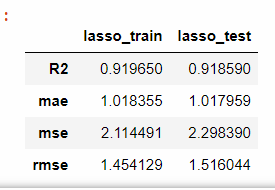

In [79]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [80]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns=['lasso_coef_1'])
# to make it more readable and be able to compare with other model's coefficients

In [81]:
pd.concat([lm_coef_df, rm_df, rgm_df, lsm_df], axis=1)

,lm_coefficients,ridge_coef_1,ridge_coef_0.02,lasso_coef_1
0,13.942084,3.428822,6.383047,0.696016
1,-3.147845,0.689086,0.709275,0.000000
2,0.622117,0.170305,0.478838,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000
4,17.227695,2.723077,3.997813,3.490946
5,-3.875031,0.112909,-0.714940,0.000000
6,14.688014,-0.404686,-0.509197,0.000000
7,0.835494,0.287950,0.727012,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000
9,115.503087,-1.014535,2.244645,0.000000


### Choosing best alpha value with GridSearchCV for Lasso

**Lasso Regression Hyperparameters**

[Lasso Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

```python
class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')



1. alpha (α): 
    - Indicates the degree of regularization. Low values increase the risk of the model being overfit, while high values can make the model underfit. This parameter is usually optimized by cross-validation.
    - Specifically, it is also called the \( \lambda \) value and specifies the total weight of the L1 and L2 terms in the cost function.

2. **fit_intercept**:
    - When set to True (default), the model adds a constant known as the intercept. If set to False, the model is fitted without the intercept.

3. **normalize**:
    - This parameter is specified as 'deprecated', meaning that it is recommended not to be used in this release or in releases in the near future.
    - Previously, this, when set to True, indicated whether the regressors should be normalized before (before the fitting phase).

4. **precompute**:
    - Used to specify a pre-computed Gram matrix to increase speed. Usually useful for large data sets.

5. **copy_X**:
    - When set to True (default), a copy of X is copied at runtime so that it is not affected by changes made while processing. If set to False, operations are performed in-place on X.

6. **max_iter**:
    - Specifies the maximum number of iterations the model can do during training. It is usually used to specify a sufficient number of iterations to allow the model to converge.

7. **tol**:
    - Tolerance for the convergence criterion. When the change between two consecutive iterations is less than this value, the algorithm is considered converged and stops.

8. **warm_start**:
    - When set to true, fit reusing the remaining solution from the previous call. This can be useful in case of repeated fitting with various parameters.

9. **positive**:
    - When set to `true`, it forces the coefficients to be positive. That is, the prediction of the model will be directly proportional to the features.

10. **random_state**:
    - Specifies the seed value of the random number generator. This is used to ensure that the model works the same way every time.

11. **selection**:
    - If set to cyclic (the default), all features are passed through in each iteration. When set to 'random', a random feature is selected at each iteration. This can result in a fast convergence for large feature sets.

In [82]:
alpha_space
# hundred different alpha values

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [83]:
lasso_model_gcv = Lasso()

param_grid = {'alpha':alpha_space}

grid_lasso = GridSearchCV(estimator=lasso_model_gcv,
                         param_grid=param_grid,
                         scoring='neg_root_mean_squared_error', 
                         cv = 10, 
                         verbose=3, 
                         return_train_score=True)
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END .alpha=0.01;, score=(train=-0.550, test=-0.461) total time=   0.0s
[CV 2/10] END .alpha=0.01;, score=(train=-0.551, test=-0.470) total time=   0.0s
[CV 3/10] END .alpha=0.01;, score=(train=-0.551, test=-0.395) total time=   0.0s
[CV 4/10] END .alpha=0.01;, score=(train=-0.545, test=-0.565) total time=   0.0s
[CV 5/10] END .alpha=0.01;, score=(train=-0.555, test=-0.369) total time=   0.0s
[CV 6/10] END .alpha=0.01;, score=(train=-0.418, test=-1.505) total time=   0.0s
[CV 7/10] END .alpha=0.01;, score=(train=-0.551, test=-0.366) total time=   0.0s
[CV 8/10] END .alpha=0.01;, score=(train=-0.554, test=-0.514) total time=   0.0s
[CV 9/10] END .alpha=0.01;, score=(train=-0.532, test=-0.613) total time=   0.0s
[CV 10/10] END alpha=0.01;, score=(train=-0.558, test=-0.307) total time=   0.0s
[CV 1/10] END .alpha=0.02;, score=(train=-0.625, test=-0.518) total time=   0.0s
[CV 2/10] END .alpha=0.02;, score=(train=-0.

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.326e-01, tolerance: 3.322e-01
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.866e-01, tolerance: 3.181e-01
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objecti

[CV 1/10] END alpha=0.09999999999999999;, score=(train=-0.850, test=-0.628) total time=   0.0s
[CV 2/10] END alpha=0.09999999999999999;, score=(train=-0.846, test=-0.874) total time=   0.0s
[CV 3/10] END alpha=0.09999999999999999;, score=(train=-0.854, test=-0.626) total time=   0.0s
[CV 4/10] END alpha=0.09999999999999999;, score=(train=-0.838, test=-0.834) total time=   0.0s
[CV 5/10] END alpha=0.09999999999999999;, score=(train=-0.858, test=-0.363) total time=   0.0s
[CV 6/10] END alpha=0.09999999999999999;, score=(train=-0.683, test=-1.785) total time=   0.0s
[CV 7/10] END alpha=0.09999999999999999;, score=(train=-0.854, test=-0.581) total time=   0.0s
[CV 8/10] END alpha=0.09999999999999999;, score=(train=-0.841, test=-1.162) total time=   0.0s
[CV 9/10] END alpha=0.09999999999999999;, score=(train=-0.846, test=-0.559) total time=   0.0s
[CV 10/10] END alpha=0.09999999999999999;, score=(train=-0.852, test=-0.725) total time=   0.0s
[CV 1/10] END .alpha=0.11;, score=(train=-0.864, 

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e-01, tolerance: 3.684e-01
  model = cd_fast.enet_coordinate_descent(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Lasso()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'alpha': array([0.01, ... 1. ])}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",10
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candid

In [84]:
grid_lasso.best_params_

{'alpha': np.float64(0.01)}

In [85]:
df_lasso_grid_result = pd.DataFrame(grid_lasso.cv_results_)
df_lasso_grid_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004615,0.000628,0.000217,0.000066,0.01,{'alpha': 0.01},-0.461106,-0.470415,-0.394731,-0.565259,-0.369435,-1.505231,-0.365515,-0.514069,-0.613168,-0.307217,-0.556615,0.328857,1,-0.549992,-0.550678,-0.551329,-0.544929,-0.555439,-0.418332,-0.551461,-0.553902,-0.531596,-0.557780,-0.536544,0.040000
1,0.003692,0.000835,0.000170,0.000026,0.02,{'alpha': 0.02},-0.517620,-0.561818,-0.446611,-0.654028,-0.410011,-1.636971,-0.411221,-0.672791,-0.608804,-0.401181,-0.632106,0.348759,2,-0.624504,-0.627583,-0.633076,-0.621655,-0.626378,-0.509178,-0.631886,-0.635191,-0.611985,-0.637687,-0.615912,0.036271
2,0.001189,0.000141,0.000158,0.000012,0.03,{'alpha': 0.03},-0.577021,-0.643396,-0.503983,-0.719596,-0.445195,-1.643509,-0.464196,-0.784052,-0.634564,-0.492980,-0.690849,0.334849,3,-0.691652,-0.693775,-0.699499,-0.682679,-0.697786,-0.526121,-0.701811,-0.690632,-0.683182,-0.705503,-0.677264,0.050875
3,0.000966,0.000143,0.000152,0.000006,0.04,{'alpha': 0.04},-0.567874,-0.673348,-0.513943,-0.729644,-0.417671,-1.662930,-0.471885,-0.847520,-0.606647,-0.526803,-0.701827,0.342503,4,-0.710385,-0.711368,-0.717290,-0.700443,-0.714740,-0.545443,-0.717964,-0.713237,-0.702714,-0.722185,-0.695577,0.050441
4,0.001190,0.000512,0.000161,0.000022,0.05,{'alpha': 0.05},-0.560231,-0.703359,-0.526522,-0.747306,-0.382599,-1.712332,-0.483449,-0.929045,-0.585450,-0.558637,-0.718893,0.361432,5,-0.728800,-0.729935,-0.734919,-0.720379,-0.731762,-0.592805,-0.736141,-0.746238,-0.719090,-0.739020,-0.717909,0.042407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000342,0.000020,0.000150,0.000007,0.96,{'alpha': 0.9600000000000001},-1.007179,-1.817914,-0.753017,-1.213892,-0.990879,-2.285190,-0.924889,-2.146594,-1.066316,-1.469168,-1.367504,0.512038,96,-1.431425,-1.428132,-1.424695,-1.425234,-1.445074,-1.345270,-1.430282,-1.407337,-1.443881,-1.423410,-1.420474,0.027028
96,0.000336,0.000030,0.000151,0.000004,0.97,{'alpha': 0.97},-1.014812,-1.828563,-0.758696,-1.221740,-1.000868,-2.293160,-0.932085,-2.157406,-1.076122,-1.477710,-1.376116,0.512832,97,-1.439565,-1.436430,-1.432805,-1.433551,-1.453147,-1.353967,-1.438361,-1.415753,-1.452020,-1.431466,-1.428707,0.026857
97,0.000350,0.000038,0.000160,0.000018,0.98,{'alpha': 0.98},-1.022506,-1.839195,-0.764476,-1.229654,-1.010927,-2.301156,-0.939342,-2.168230,-1.085965,-1.486269,-1.384772,0.513604,98,-1.447743,-1.444734,-1.440952,-1.441905,-1.461227,-1.362699,-1.446478,-1.424206,-1.460197,-1.439560,-1.436970,0.026685
98,0.000354,0.000033,0.000158,0.000014,0.99,{'alpha': 0.99},-1.030260,-1.849878,-0.770353,-1.237634,-1.020975,-2.309179,-0.946658,-2.179066,-1.095845,-1.494847,-1.393470,0.514366,99,-1.455957,-1.453108,-1.449136,-1.450297,-1.469377,-1.371463,-1.454632,-1.432694,-1.468411,-1.447692,-1.445277,0.026517


In [86]:
# selecting the best index and then comparing the train and test scores of that index to evaluate overfitting or underfitting
df_lasso_grid_result[['param_alpha', 'mean_train_score', 'mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.01,-0.536544,-0.556615
1,0.02,-0.615912,-0.632106
2,0.03,-0.677264,-0.690849
3,0.04,-0.695577,-0.701827
4,0.05,-0.717909,-0.718893
...,...,...,...
95,0.96,-1.420474,-1.367504
96,0.97,-1.428707,-1.376116
97,0.98,-1.436970,-1.384772
98,0.99,-1.445277,-1.393470


In [87]:
# this will show you the best index with minimum error
grid_lasso.best_index_

np.int64(0)

In [88]:
df_lasso_grid_result[['param_alpha', 'mean_train_score', 'mean_test_score']].iloc[0]

param_alpha         0.010000
mean_train_score   -0.536544
mean_test_score    -0.556615
Name: 0, dtype: float64

In [89]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [90]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, 'grid_lasso')
lgs

,grid_lasso_train,grid_lasso_test
R2,0.988820,0.986283
mae,0.339185,0.441091
mse,0.294202,0.387259
rmse,0.542404,0.622302


In [91]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)
# we will choose the lasso model because it has less feeatures and has close r2 score between train and test data
# our goal in machine learning is to find a model with high accuracy predictions,
# a more generalized model, meaning has good performance on unseen data, 
# with less features

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988820,0.986283
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339185,0.441091
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294202,0.387259
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542404,0.622302


In [92]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train)
lsm.coef_
# I am fitting this model with the hyperparameter of grid again here, because GridSearch doesn't allow
# us to get coefficients

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e-01, tolerance: 3.684e-01
  model = cd_fast.enet_coordinate_descent(


array([ 4.2627502 ,  0.17822444,  0.13891524, -3.13777689,  4.16182023,
       -0.        ,  0.        ,  0.06332836,  0.        , -0.        ,
       -0.43751231, -0.17374222,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.48596042,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06888897,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [93]:
lgm_df = pd.DataFrame(lsm.coef_, columns=['lasso_coef_0.01'])
lgm_df

,lasso_coef_0.01
0,4.262750
1,0.178224
2,0.138915
3,-3.137777
4,4.161820
5,-0.000000
6,0.000000
7,0.063328
8,0.000000
9,-0.000000


In [94]:
pd.concat([lm_coef_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

,lm_coefficients,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01
0,13.942084,3.428822,6.383047,0.696016,4.262750
1,-3.147845,0.689086,0.709275,0.000000,0.178224
2,0.622117,0.170305,0.478838,0.000000,0.138915
3,-58.348614,-0.910850,-8.015483,0.000000,-3.137777
4,17.227695,2.723077,3.997813,3.490946,4.161820
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.063328
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000


## Elastic Net

It is a combination of Ridge Regression and Lasso techniques. 

It has two separate regularization parameters to determine the strength of the regularization terms, so that a balance between Ridge Regression and Lasso can be found. 

When the hyperparameter l1_ratio=1, it behaves like Lasso and when l1_ratio=0, it behaves like Ridge. In general, Lasso is inclined.

**Advantages of Elastic-Net:**

1. **Feature Selection and Regularization**: Elastic-Net combines the feature selection capacity of Lasso and the regularization that Ridge applies to model coefficients. This is useful when you want both feature selection and regularization of the coefficients.

2. **Multicollinearity**: In data sets with highly correlated features, Lasso can select a feature at random. Elastic-Net can alleviate this problem by selecting groups of such features together.

3. **High Dimensional Data**: When the number of features is larger than the number of observations, Elastic-Net provides the stability of Ridge while maintaining the advantages of Lasso.

**Cases where Elastic-Net will be used:**

Elastic-Net is often useful when many features have high correlation with each other and at the same time you want to discard some features completely. If you need feature selection but at the same time want to manage the high correlation between features, Elastic-Net fulfills the need to strike such a balance.

**ElasticNet Regression Hyperparameters**

[ElasticNet Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

```python
class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize='deprecated', precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

**alpha**:
   - This parameter controls the overall regularization severity.
   - When alpha = 0, ElasticNet does no regularization.
   - As alpha increases, the severity of regularization increases. This can help make the model more resistant to overfitting. 

**l1_ratio**:
   - This parameter controls the mix between L1 (Lasso) and L2 (Ridge) regularization.
   - When l1_ratio = 1, this means all L1 (i.e. only Lasso).
   - When l1_ratio = 0, this means purely L2 (i.e. only Ridge).
   - When 0 < l1_ratio < 1, you get a combination of both L1 and L2 arrangements. 
   - For example, l1_ratio = 0.5 means that L1 and L2 arrangements are used equally.

In [95]:
from sklearn.linear_model import ElasticNet

In [96]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
# vanilla or default or base model

In [97]:
elastic_model.fit(X_train_scaled, y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",1
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0.5
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [98]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [99]:
es = train_val(y_train, y_train_pred, y_test, y_pred, 'elastic')
es
# the score is very close to lasso model

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [100]:
pd.concat([ls, rs, rgs, lss, lgs, es], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988820,0.986283,0.896126,0.902016
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339185,0.441091,1.248480,1.200654
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294202,0.387259,2.733565,2.766287
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542404,0.622302,1.653350,1.663216


### For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [101]:
model = ElasticNet(alpha=1, l1_ratio=0.5)

In [102]:
scores = cross_validate(model, 
                       X_train_scaled, 
                       y_train,
                       scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'],
                           cv=10,
                       return_train_score=True)
# just like ridge and lasso, we performed cross validate to validate the scores we got.

In [103]:
scores = pd.DataFrame(scores, index=range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.000998,0.000806,0.941946,0.893559,-1.066213,-1.267332,-1.420073,-2.806020,-1.191668,-1.675118
2,0.000731,0.000567,0.896184,0.891138,-1.412626,-1.259500,-3.727403,-2.748049,-1.930648,-1.657724
3,0.000538,0.000528,0.943570,0.898015,-0.838742,-1.260740,-1.075660,-2.760063,-1.037140,-1.661344
4,0.000511,0.000512,0.912964,0.894946,-1.079273,-1.271821,-2.192921,-2.772992,-1.480851,-1.665230
5,0.000494,0.000512,0.927746,0.891532,-1.048461,-1.276709,-1.367174,-2.817591,-1.169262,-1.678568
6,0.000514,0.000512,0.779091,0.907410,-1.710796,-1.202227,-6.963506,-2.382899,-2.638845,-1.543664
7,0.000477,0.000505,0.947015,0.895781,-0.766668,-1.277312,-1.078353,-2.811098,-1.038438,-1.676633
8,0.000602,0.000826,0.828893,0.893848,-2.086681,-1.223401,-5.756482,-2.689433,-2.399267,-1.639949
9,0.000661,0.000550,0.855858,0.896804,-1.234090,-1.224054,-2.210143,-2.772310,-1.486655,-1.665026
10,0.000538,0.000514,0.821285,0.899363,-1.669600,-1.219994,-3.579193,-2.715163,-1.891875,-1.647775


In [104]:
scores.iloc[:, 2:].mean()

test_r2                              0.885455
train_r2                             0.896240
test_neg_mean_absolute_error        -1.291315
train_neg_mean_absolute_error       -1.248309
test_neg_mean_squared_error         -2.937091
train_neg_mean_squared_error        -2.727562
test_neg_root_mean_squared_error    -1.626465
train_neg_root_mean_squared_error   -1.651103
dtype: float64

In [105]:
train_val(y_train, y_train_pred, y_test, y_pred, 'elastic')
# as there is no much difference between the scores of cv and default model, we are good to go.

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [106]:
elastic_model.coef_
# model is using a lot of features

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [107]:
em_df = pd.DataFrame(elastic_model.coef_, columns=['elastic_coef_(alp:1, l1:0.5)'])
em_df

,"elastic_coef_(alp:1, l1:0.5)"
0,0.862936
1,0.211443
2,0.000000
3,0.290767
4,0.980991
5,0.002498
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [108]:
pd.concat([lm_coef_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis=1)

,lm_coefficients,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,13.942084,3.428822,6.383047,0.696016,4.262750,0.862936
1,-3.147845,0.689086,0.709275,0.000000,0.178224,0.211443
2,0.622117,0.170305,0.478838,0.000000,0.138915,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000,-3.137777,0.290767
4,17.227695,2.723077,3.997813,3.490946,4.161820,0.980991
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.063328,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000


### Choosing best alpha and l1_ratio values with GridSearchCV for Elastic-Net

In [109]:
elastic_model = ElasticNet()
param_grid2 = {'alpha':[0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 0.8, 1],
              'l1_ratio':[0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]}

# When inserting more than 1 hyperparameter into gridsearch, we cannot make the hyperparameter space as large as we want. Because
# gridsearchcv is a very costly algorithm. both alpha and l1_ratio hyperparameters have 7 elements. 
# gridsearchcv 7x7x (cv count) --> 7x7x10= 490 iterations. what are the hyperparameter spaces or cv count
# The bigger it is, the higher the cost. We need to provide this trade off well.

In [110]:
grid_model = GridSearchCV(estimator=elastic_model, param_grid=param_grid2, cv=10, verbose=3, 
                         scoring='neg_root_mean_squared_error', return_train_score=True)

# when gridsearchcv is given more than 1 hyperparameters, it tries all possible combinations of these hyperparameters
# and finds the best combination and retures the one that gives the best score.

In [111]:
grid_model.fit(X_train_scaled, y_train)

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.663e+01, tolerance: 3.322e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.559e+01, tolerance: 3.181e-01
Linear regression models with a zero l1 penaliz

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV 1/10] END alpha=0.01, l1_ratio=0;, score=(train=-0.585, test=-0.536) total time=   0.0s
[CV 2/10] END alpha=0.01, l1_ratio=0;, score=(train=-0.572, test=-0.669) total time=   0.0s
[CV 3/10] END alpha=0.01, l1_ratio=0;, score=(train=-0.577, test=-0.612) total time=   0.0s
[CV 4/10] END alpha=0.01, l1_ratio=0;, score=(train=-0.571, test=-0.856) total time=   0.0s
[CV 5/10] END alpha=0.01, l1_ratio=0;, score=(train=-0.587, test=-0.406) total time=   0.0s
[CV 6/10] END alpha=0.01, l1_ratio=0;, score=(train=-0.458, test=-1.638) total time=   0.0s
[CV 7/10] END alpha=0.01, l1_ratio=0;, score=(train=-0.584, test=-0.378) total time=   0.0s
[CV 8/10] END alpha=0.01, l1_ratio=0;, score=(train=-0.585, test=-0.603) total time=   0.0s
[CV 9/10] END alpha=0.01, l1_ratio=0;, score=(train=-0.565, test=-0.594) total time=   0.0s
[CV 10/10] END alpha=0.01, l1_ratio=0;, score=(train=-0.592, test=-0.439) total time=   0.0s
[CV 1/10] END al

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.483e+00, tolerance: 3.322e-01
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.144e+00, tolerance: 3.181e-01
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objecti

[CV 6/10] END alpha=0.01, l1_ratio=0.5;, score=(train=-0.460, test=-1.624) total time=   0.0s
[CV 7/10] END alpha=0.01, l1_ratio=0.5;, score=(train=-0.585, test=-0.375) total time=   0.0s
[CV 8/10] END alpha=0.01, l1_ratio=0.5;, score=(train=-0.587, test=-0.600) total time=   0.0s
[CV 9/10] END alpha=0.01, l1_ratio=0.5;, score=(train=-0.565, test=-0.611) total time=   0.0s
[CV 10/10] END alpha=0.01, l1_ratio=0.5;, score=(train=-0.591, test=-0.384) total time=   0.0s
[CV 1/10] END alpha=0.01, l1_ratio=0.75;, score=(train=-0.578, test=-0.501) total time=   0.0s
[CV 2/10] END alpha=0.01, l1_ratio=0.75;, score=(train=-0.572, test=-0.541) total time=   0.0s
[CV 3/10] END alpha=0.01, l1_ratio=0.75;, score=(train=-0.579, test=-0.433) total time=   0.0s
[CV 4/10] END alpha=0.01, l1_ratio=0.75;, score=(train=-0.571, test=-0.591) total time=   0.0s
[CV 5/10] END alpha=0.01, l1_ratio=0.75;, score=(train=-0.582, test=-0.387) total time=   0.0s
[CV 6/10] END alpha=0.01, l1_ratio=0.75;, score=(train

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.648e-01, tolerance: 3.399e-01
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.309e-01, tolerance: 3.322e-01
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objecti

[CV 7/10] END alpha=0.01, l1_ratio=1;, score=(train=-0.551, test=-0.366) total time=   0.0s
[CV 8/10] END alpha=0.01, l1_ratio=1;, score=(train=-0.554, test=-0.514) total time=   0.0s
[CV 9/10] END alpha=0.01, l1_ratio=1;, score=(train=-0.532, test=-0.613) total time=   0.0s
[CV 10/10] END alpha=0.01, l1_ratio=1;, score=(train=-0.558, test=-0.307) total time=   0.0s
[CV 1/10] END alpha=0.02, l1_ratio=0;, score=(train=-0.667, test=-0.624) total time=   0.0s
[CV 2/10] END alpha=0.02, l1_ratio=0;, score=(train=-0.660, test=-0.754) total time=   0.0s
[CV 3/10] END alpha=0.02, l1_ratio=0;, score=(train=-0.664, test=-0.625) total time=   0.0s
[CV 4/10] END alpha=0.02, l1_ratio=0;, score=(train=-0.658, test=-0.659) total time=   0.0s
[CV 5/10] END alpha=0.02, l1_ratio=0;, score=(train=-0.673, test=-0.439) total time=   0.0s
[CV 6/10] END alpha=0.02, l1_ratio=0;, score=(train=-0.532, test=-1.797) total time=   0.0s
[CV 7/10] END alpha=0.02, l1_ratio=0;, score=(train=-0.674, test=-0.402) total 

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.789e+01, tolerance: 3.192e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.917e+01, tolerance: 3.385e-01
Linear regression models with a zero l1 penaliz

[CV 8/10] END alpha=0.02, l1_ratio=0.5;, score=(train=-0.666, test=-0.720) total time=   0.0s
[CV 9/10] END alpha=0.02, l1_ratio=0.5;, score=(train=-0.660, test=-0.604) total time=   0.0s
[CV 10/10] END alpha=0.02, l1_ratio=0.5;, score=(train=-0.677, test=-0.495) total time=   0.0s
[CV 1/10] END alpha=0.02, l1_ratio=0.75;, score=(train=-0.663, test=-0.576) total time=   0.0s
[CV 2/10] END alpha=0.02, l1_ratio=0.75;, score=(train=-0.664, test=-0.627) total time=   0.0s
[CV 3/10] END alpha=0.02, l1_ratio=0.75;, score=(train=-0.668, test=-0.507) total time=   0.0s
[CV 4/10] END alpha=0.02, l1_ratio=0.75;, score=(train=-0.655, test=-0.670) total time=   0.0s
[CV 5/10] END alpha=0.02, l1_ratio=0.75;, score=(train=-0.667, test=-0.425) total time=   0.0s
[CV 6/10] END alpha=0.02, l1_ratio=0.75;, score=(train=-0.507, test=-1.691) total time=   0.0s
[CV 7/10] END alpha=0.02, l1_ratio=0.75;, score=(train=-0.671, test=-0.434) total time=   0.0s
[CV 8/10] END alpha=0.02, l1_ratio=0.75;, score=(tra

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.090e-01, tolerance: 3.326e-01
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.167e-01, tolerance: 3.192e-01
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objecti

[CV 1/10] END alpha=0.05, l1_ratio=0.1;, score=(train=-0.786, test=-0.690) total time=   0.0s
[CV 2/10] END alpha=0.05, l1_ratio=0.1;, score=(train=-0.781, test=-0.880) total time=   0.0s
[CV 3/10] END alpha=0.05, l1_ratio=0.1;, score=(train=-0.790, test=-0.628) total time=   0.0s
[CV 4/10] END alpha=0.05, l1_ratio=0.1;, score=(train=-0.786, test=-0.720) total time=   0.0s
[CV 5/10] END alpha=0.05, l1_ratio=0.1;, score=(train=-0.798, test=-0.437) total time=   0.0s
[CV 6/10] END alpha=0.05, l1_ratio=0.1;, score=(train=-0.630, test=-1.966) total time=   0.0s
[CV 7/10] END alpha=0.05, l1_ratio=0.1;, score=(train=-0.798, test=-0.466) total time=   0.0s
[CV 8/10] END alpha=0.05, l1_ratio=0.1;, score=(train=-0.787, test=-0.926) total time=   0.0s
[CV 9/10] END alpha=0.05, l1_ratio=0.1;, score=(train=-0.791, test=-0.554) total time=   0.0s
[CV 10/10] END alpha=0.05, l1_ratio=0.1;, score=(train=-0.794, test=-0.704) total time=   0.0s
[CV 1/10] END alpha=0.05, l1_ratio=0.25;, score=(train=-0.7

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e+02, tolerance: 3.322e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.783e+01, tolerance: 3.181e-01
Linear regression models with a zero l1 penaliz

[CV 7/10] END alpha=0.1, l1_ratio=0;, score=(train=-0.919, test=-0.527) total time=   0.0s
[CV 8/10] END alpha=0.1, l1_ratio=0;, score=(train=-0.901, test=-1.153) total time=   0.0s
[CV 9/10] END alpha=0.1, l1_ratio=0;, score=(train=-0.917, test=-0.591) total time=   0.0s
[CV 10/10] END alpha=0.1, l1_ratio=0;, score=(train=-0.910, test=-0.874) total time=   0.0s
[CV 1/10] END alpha=0.1, l1_ratio=0.1;, score=(train=-0.903, test=-0.725) total time=   0.0s
[CV 2/10] END alpha=0.1, l1_ratio=0.1;, score=(train=-0.895, test=-1.021) total time=   0.0s
[CV 3/10] END alpha=0.1, l1_ratio=0.1;, score=(train=-0.911, test=-0.696) total time=   0.0s
[CV 4/10] END alpha=0.1, l1_ratio=0.1;, score=(train=-0.904, test=-0.813) total time=   0.0s
[CV 5/10] END alpha=0.1, l1_ratio=0.1;, score=(train=-0.918, test=-0.476) total time=   0.0s
[CV 6/10] END alpha=0.1, l1_ratio=0.1;, score=(train=-0.736, test=-2.105) total time=   0.0s
[CV 7/10] END alpha=0.1, l1_ratio=0.1;, score=(train=-0.916, test=-0.529) tot

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.774e+02, tolerance: 3.273e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.447e+02, tolerance: 3.243e-01
Linear regression models with a zero l1 penaliz

[CV 10/10] END alpha=0.3, l1_ratio=0;, score=(train=-1.176, test=-1.226) total time=   0.0s
[CV 1/10] END alpha=0.3, l1_ratio=0.1;, score=(train=-1.201, test=-0.810) total time=   0.0s
[CV 2/10] END alpha=0.3, l1_ratio=0.1;, score=(train=-1.176, test=-1.330) total time=   0.0s
[CV 3/10] END alpha=0.3, l1_ratio=0.1;, score=(train=-1.199, test=-0.951) total time=   0.0s
[CV 4/10] END alpha=0.3, l1_ratio=0.1;, score=(train=-1.198, test=-0.982) total time=   0.0s
[CV 5/10] END alpha=0.3, l1_ratio=0.1;, score=(train=-1.213, test=-0.746) total time=   0.0s
[CV 6/10] END alpha=0.3, l1_ratio=0.1;, score=(train=-1.037, test=-2.366) total time=   0.0s
[CV 7/10] END alpha=0.3, l1_ratio=0.1;, score=(train=-1.202, test=-0.705) total time=   0.0s
[CV 8/10] END alpha=0.3, l1_ratio=0.1;, score=(train=-1.174, test=-1.601) total time=   0.0s
[CV 9/10] END alpha=0.3, l1_ratio=0.1;, score=(train=-1.212, test=-1.009) total time=   0.0s
[CV 10/10] END alpha=0.3, l1_ratio=0.1;, score=(train=-1.194, test=-1.2

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.818e+02, tolerance: 3.322e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.694e+02, tolerance: 3.181e-01
Linear regression models with a zero l1 penaliz

[CV 8/10] END alpha=1, l1_ratio=0;, score=(train=-1.605, test=-2.247) total time=   0.0s
[CV 9/10] END alpha=1, l1_ratio=0;, score=(train=-1.664, test=-1.554) total time=   0.0s
[CV 10/10] END alpha=1, l1_ratio=0;, score=(train=-1.632, test=-1.778) total time=   0.0s
[CV 1/10] END alpha=1, l1_ratio=0.1;, score=(train=-1.686, test=-1.191) total time=   0.0s
[CV 2/10] END alpha=1, l1_ratio=0.1;, score=(train=-1.661, test=-1.855) total time=   0.0s
[CV 3/10] END alpha=1, l1_ratio=0.1;, score=(train=-1.675, test=-1.254) total time=   0.0s
[CV 4/10] END alpha=1, l1_ratio=0.1;, score=(train=-1.686, test=-1.562) total time=   0.0s
[CV 5/10] END alpha=1, l1_ratio=0.1;, score=(train=-1.693, test=-1.222) total time=   0.0s
[CV 6/10] END alpha=1, l1_ratio=0.1;, score=(train=-1.532, test=-2.755) total time=   0.0s
[CV 7/10] END alpha=1, l1_ratio=0.1;, score=(train=-1.693, test=-0.986) total time=   0.0s
[CV 8/10] END alpha=1, l1_ratio=0.1;, score=(train=-1.639, test=-2.299) total time=   0.0s
[CV 

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e-01, tolerance: 3.684e-01
  model = cd_fast.enet_coordinate_descent(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",ElasticNet()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'alpha': [0.01, 0.02, ...], 'l1_ratio': [0, 0.1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",10
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed

In [112]:
grid_model.best_params_

# When we look at the best hyperparameters it finds, we see that it completely converges to the lasso model.
# If the values found after gridsearch turn out to be boundary values, we can rebuild our hyperparameter space starting from the boundary value. 
# When the alpha 0.01 boundary value came out, we could redetermine our alpha, but the scores were very
# We did not set our repetition space from 0.01 as there is not much play, but in best practice we need to do this.

{'alpha': 0.01, 'l1_ratio': 1}

In [113]:
df_grid_elastic = pd.DataFrame(grid_model.cv_results_)
df_grid_elastic

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005753,0.000256,0.000252,0.000094,0.01,0.00,"{'alpha': 0.01, 'l1_ratio': 0}",-0.535676,-0.669197,-0.611824,-0.856410,-0.406016,-1.638124,-0.378072,-0.602985,-0.594395,-0.438831,-0.673153,0.348123,12,-0.584522,-0.571835,-0.577335,-0.571319,-0.587406,-0.458336,-0.584208,-0.585172,-0.565038,-0.591693,-0.567686,0.037303
1,0.005874,0.000141,0.000200,0.000038,0.01,0.10,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.541561,-0.657697,-0.576682,-0.705267,-0.400971,-1.638762,-0.376817,-0.603158,-0.595195,-0.426597,-0.652271,0.344905,9,-0.586721,-0.574067,-0.579930,-0.573422,-0.589143,-0.460880,-0.586847,-0.586441,-0.566285,-0.593874,-0.569761,0.037172
2,0.004888,0.000654,0.000183,0.000028,0.01,0.25,"{'alpha': 0.01, 'l1_ratio': 0.25}",-0.535391,-0.635186,-0.527698,-0.610099,-0.394219,-1.637164,-0.375298,-0.599417,-0.596676,-0.407768,-0.631892,0.347287,6,-0.584484,-0.575931,-0.581366,-0.574848,-0.588291,-0.462680,-0.586420,-0.585922,-0.566663,-0.593207,-0.569981,0.036500
3,0.003517,0.000634,0.000186,0.000039,0.01,0.50,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.518583,-0.592423,-0.480625,-0.580801,-0.385799,-1.624122,-0.374793,-0.600299,-0.611076,-0.384226,-0.615274,0.348006,5,-0.583387,-0.576676,-0.583046,-0.576320,-0.588196,-0.459906,-0.585262,-0.586590,-0.565283,-0.591436,-0.569610,0.037248
4,0.004657,0.000584,0.000194,0.000044,0.01,0.75,"{'alpha': 0.01, 'l1_ratio': 0.75}",-0.501401,-0.541391,-0.432996,-0.590745,-0.387424,-1.588269,-0.377179,-0.585094,-0.625093,-0.353791,-0.598338,0.342650,4,-0.577651,-0.572230,-0.579051,-0.571272,-0.581953,-0.448267,-0.579058,-0.581530,-0.559961,-0.586043,-0.563702,0.039096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.000491,0.000027,0.000150,0.000004,1.00,0.50,"{'alpha': 1, 'l1_ratio': 0.5}",-1.191668,-1.930648,-1.037140,-1.480851,-1.169262,-2.638845,-1.038438,-2.399267,-1.486655,-1.891875,-1.626465,0.540094,61,-1.675118,-1.657724,-1.661344,-1.665230,-1.678568,-1.543664,-1.676633,-1.639949,-1.665026,-1.647775,-1.651103,0.037688
60,0.000444,0.000038,0.000160,0.000036,1.00,0.75,"{'alpha': 1, 'l1_ratio': 0.75}",-1.246652,-1.962478,-0.956624,-1.459182,-1.183396,-2.522380,-1.083191,-2.405503,-1.336387,-1.809607,-1.596540,0.523792,60,-1.639523,-1.633801,-1.628315,-1.630762,-1.653842,-1.532002,-1.640754,-1.613034,-1.638295,-1.620426,-1.623075,0.032195
61,0.000442,0.000027,0.000155,0.000008,1.00,0.90,"{'alpha': 1, 'l1_ratio': 0.9}",-1.195893,-1.944291,-0.872115,-1.370126,-1.175215,-2.402975,-1.036378,-2.329257,-1.219493,-1.660008,-1.520575,0.512298,56,-1.566245,-1.569291,-1.553007,-1.555421,-1.581043,-1.483070,-1.561021,-1.550993,-1.570304,-1.551121,-1.554152,0.025458
62,0.000455,0.000051,0.000176,0.000040,1.00,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-1.145802,-1.902969,-0.824821,-1.314648,-1.149723,-2.347861,-1.004023,-2.251604,-1.152869,-1.563724,-1.465804,0.504321,54,-1.512767,-1.509039,-1.502823,-1.504555,-1.527841,-1.426367,-1.508730,-1.499141,-1.517463,-1.496050,-1.500478,0.026202


In [114]:
df_grid_elastic[["param_alpha", "param_l1_ratio", "mean_train_score", "mean_test_score"]].apply(abs)

,param_alpha,param_l1_ratio,mean_train_score,mean_test_score
0,0.01,0.00,0.567686,0.673153
1,0.01,0.10,0.569761,0.652271
2,0.01,0.25,0.569981,0.631892
3,0.01,0.50,0.569610,0.615274
4,0.01,0.75,0.563702,0.598338
...,...,...,...,...
59,1.00,0.50,1.651103,1.626465
60,1.00,0.75,1.623075,1.596540
61,1.00,0.90,1.554152,1.520575
62,1.00,0.95,1.500478,1.465804


In [115]:
grid_model.best_index_

np.int64(7)

In [116]:
df_grid_elastic[["param_alpha", "param_l1_ratio", "mean_train_score", "mean_test_score"]].apply(abs).iloc[7]

param_alpha         0.010000
param_l1_ratio      1.000000
mean_train_score    0.536544
mean_test_score     0.556615
Name: 7, dtype: float64

In [117]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)
# elastic net alpha = 0.01, l1_ratio = 1 --> this model refers to lasso 0.01, which is the 
# model we found after gridsearch on lasso

In [118]:
train_val(y_train, y_train_pred, y_test, y_pred, 'elastic_grid')


,elastic_grid_train,elastic_grid_test
R2,0.988820,0.986283
mae,0.339185,0.441091
mse,0.294202,0.387259
rmse,0.542404,0.622302


**as the best model of elastic net and best model of lasso is the exact same model, we are going to choose lasso 0.01**
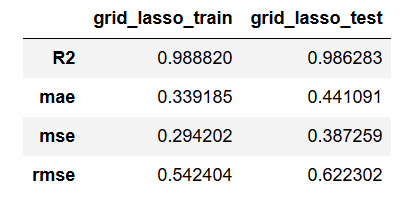

# Final Model

In [119]:
# once we find the best scoring model, we are going to train this model on the entire dataset for one last time
# it is called the final model, and we train it on the entire dataset, because the more data we have on training, 
# the better the model will become.

final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

# since we will train our final model with the entire dataset, we scall the entire data
# and fit and transform in one step

In [120]:
final_model = Lasso(alpha=0.01)
final_model.fit(X_scaled, y)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.01
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


#### After we find our final mode, our company gives a new data to see if we predict the sale correctly

In [ ]:
# whenever we train a final model, we will use it to make prediction
new_sample = [[120, 30, 15]]
# 120 = TV, 30 = radio, 15 = newspaper

In [122]:
poly_sample = polynomial_converter.transform(new_sample)
poly_sample

# Number of features the model is trained with should be the same as the number of features of the data we will predict.
# For this reason, we will use our new observation and convert to poly features of degree 5 as in our training data.

# polynomial_converter variable, created at the beginning of the notebook that converts our data to poly features of degree 5 
# Here we can only transform our new observation into poly featurs by transforming.

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.20000e+02, 3.00000e+01, 1.50000e+01, 1.44000e+04, 3.60000e+03,
        1.80000e+03, 9.00000e+02, 4.50000e+02, 2.25000e+02, 1.72800e+06,
        4.32000e+05, 2.16000e+05, 1.08000e+05, 5.40000e+04, 2.70000e+04,
        2.70000e+04, 1.35000e+04, 6.75000e+03, 3.37500e+03, 2.07360e+08,
        5.18400e+07, 2.59200e+07, 1.29600e+07, 6.48000e+06, 3.24000e+06,
        3.24000e+06, 1.62000e+06, 8.10000e+05, 4.05000e+05, 8.10000e+05,
        4.05000e+05, 2.02500e+05, 1.01250e+05, 5.06250e+04, 2.48832e+10,
        6.22080e+09, 3.11040e+09, 1.55520e+09, 7.77600e+08, 3.88800e+08,
        3.88800e+08, 1.94400e+08, 9.72000e+07, 4.86000e+07, 9.72000e+07,
        4.86000e+07, 2.43000e+07, 1.21500e+07, 6.07500e+06, 2.43000e+07,
        1.21500e+07, 6.07500e+06, 3.03750e+06, 1.51875e+06, 7.59375e+05]])

In [123]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

array([[-0.31577196,  0.4548387 , -0.71597883, -0.57077539,  0.03272058,
        -0.57592103,  0.19000979, -0.40058135, -0.63510616, -0.65720536,
        -0.31206336, -0.55202038, -0.04766154, -0.38643187, -0.51941065,
        -0.03520625, -0.38068747, -0.49999458, -0.46689176, -0.65648983,
        -0.45750129, -0.52191971, -0.28669542, -0.40502644, -0.43636671,
        -0.15916772, -0.36507868, -0.43033507, -0.40034085, -0.19390994,
        -0.3974766 , -0.46387749, -0.40709947, -0.3333081 , -0.6202272 ,
        -0.49586916, -0.48043767, -0.39338379, -0.3965582 , -0.38051123,
        -0.3064592 , -0.37269676, -0.36480616, -0.32445027, -0.24449599,
        -0.37174771, -0.40748233, -0.35630191, -0.30216523, -0.29498002,
        -0.41062561, -0.44776182, -0.39109921, -0.3048257 , -0.24565976]])

In [ ]:
final_model.predict(scaled_sample)
# we found that if we spend 120 = TV, 30 = radio, 15 = newspaper, our sales will be around 14.9.

array([14.49345346])

# Feature Importance

**Feature Importance** is a key concept in machine learning that helps us understand the significance of different features (variables) in predicting the target variable. Determining feature importance is essential for multiple reasons, such as model interpretation, feature selection, and improving model performance. Here’s a detailed explanation:

**What is Feature Importance?**

Feature importance refers to techniques that assign a score to input features based on their relevance in predicting the target variable. These scores help identify which features contribute most to the predictive power of the model.

**Methods to Determine Feature Importance**

1. **Coefficients in Linear Models**:
   - In linear regression and logistic regression models, the magnitude of the coefficients indicates the importance of each feature. Larger absolute values indicate more importance.

2. **Tree-Based Methods**:
   - **Decision Trees and Random Forests**: These models naturally provide feature importance scores based on how often and how effectively features are used to split the data.
   - **Gradient Boosting Machines**: Similar to Random Forests, GBMs provide feature importance scores.

3. **SHAP Values (SHapley Additive exPlanations)**:
   - SHAP values provide a unified measure of feature importance for any machine learning model by assigning an importance value to each feature for a particular prediction.

**Why is Feature Importance Important?**

1. **Model Interpretation**:
   - Understanding which features are most important helps in interpreting the model’s decisions,  making the model more transparent and trustworthy.

2. **Feature Selection**:
   - By identifying and selecting the most important features, we can reduce the dimensionality of the data, which can lead to simpler, faster, and often more accurate models.

3. **Improving Model Performance**:
   - Removing irrelevant or less important features can improve model performance by reducing overfitting and making the model more generalizable.

## Feature Importance with Ridge

In [125]:
# pip install yellowbrick

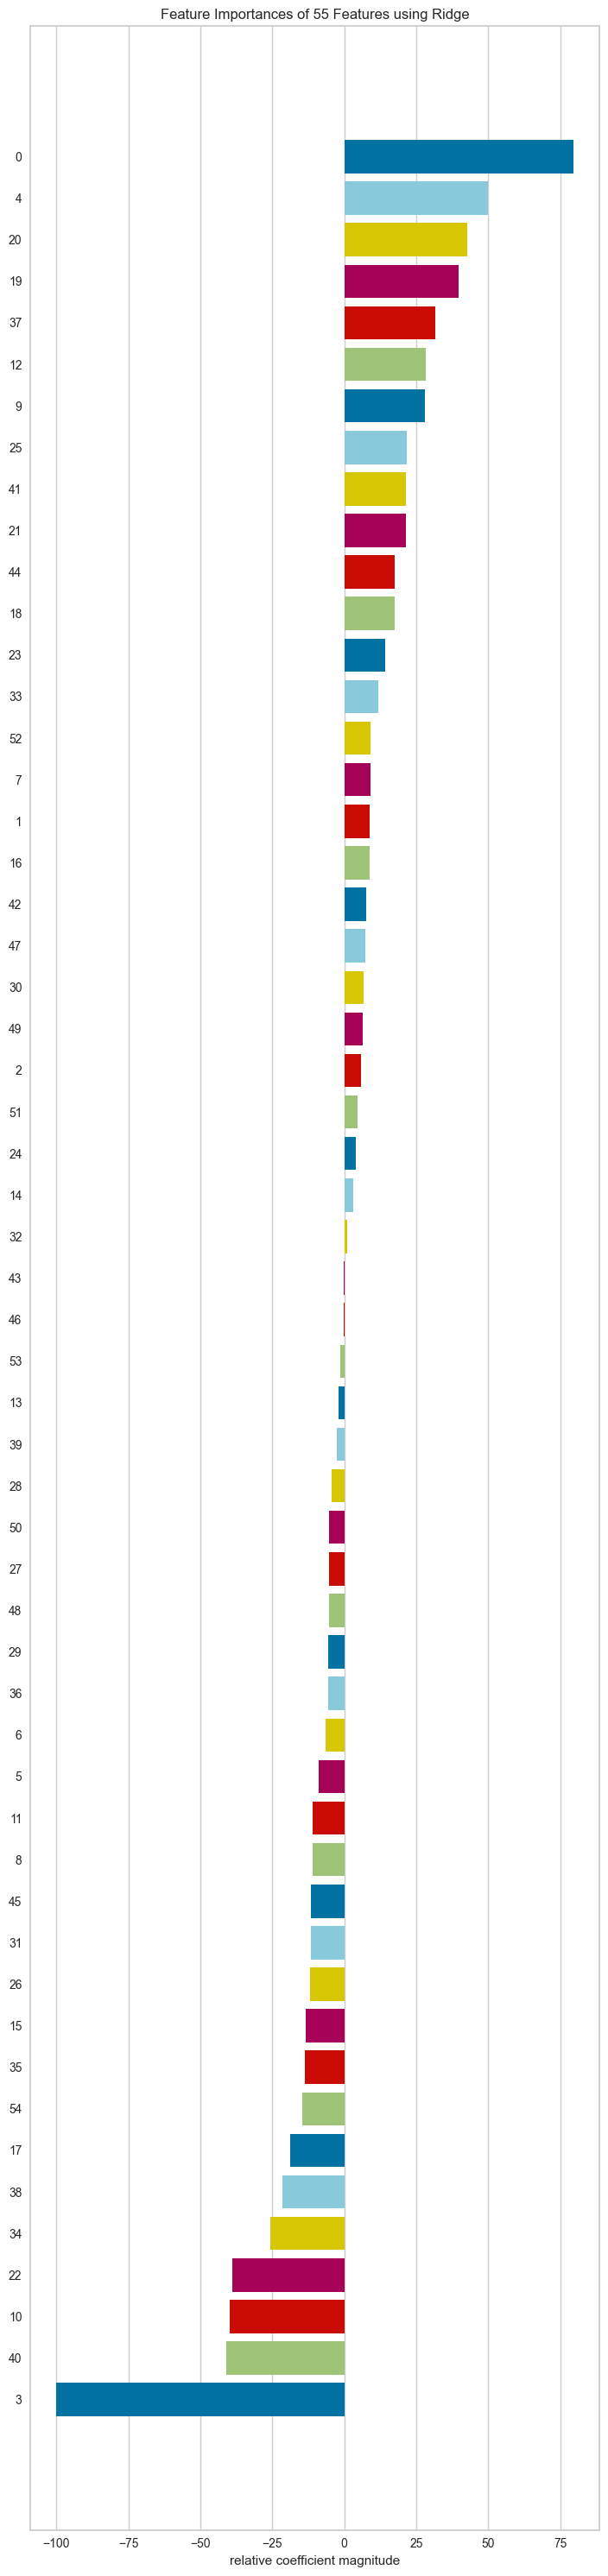

In [126]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.02)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# You can sort features according to their importance via the FeatureImportances function of the yellowbrick library, or you can use the feature
# We can make a selection. FeatureImportances the model with alpha=0.02 hyperparameter which gives the best score for the Ridge model
# We give the columns names of df as labels.

# After our model completes training on train data, we get our visualization with viz.show() command.
# Since our model is a ridge model, we can only group the features here as important or unimportant. Absolutely
# we cannot do feature selection.

# visualizer = RadViz(size=(720, 3000)) is only used to play with the visual size. 720,3000 numbers
# can be changed and changes in the visual can be observed.

## Feature Importance with Lasso

/Users/VG/Documents/TechProEducation/Data Science/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e-01, tolerance: 3.684e-01
  model = cd_fast.enet_coordinate_descent(


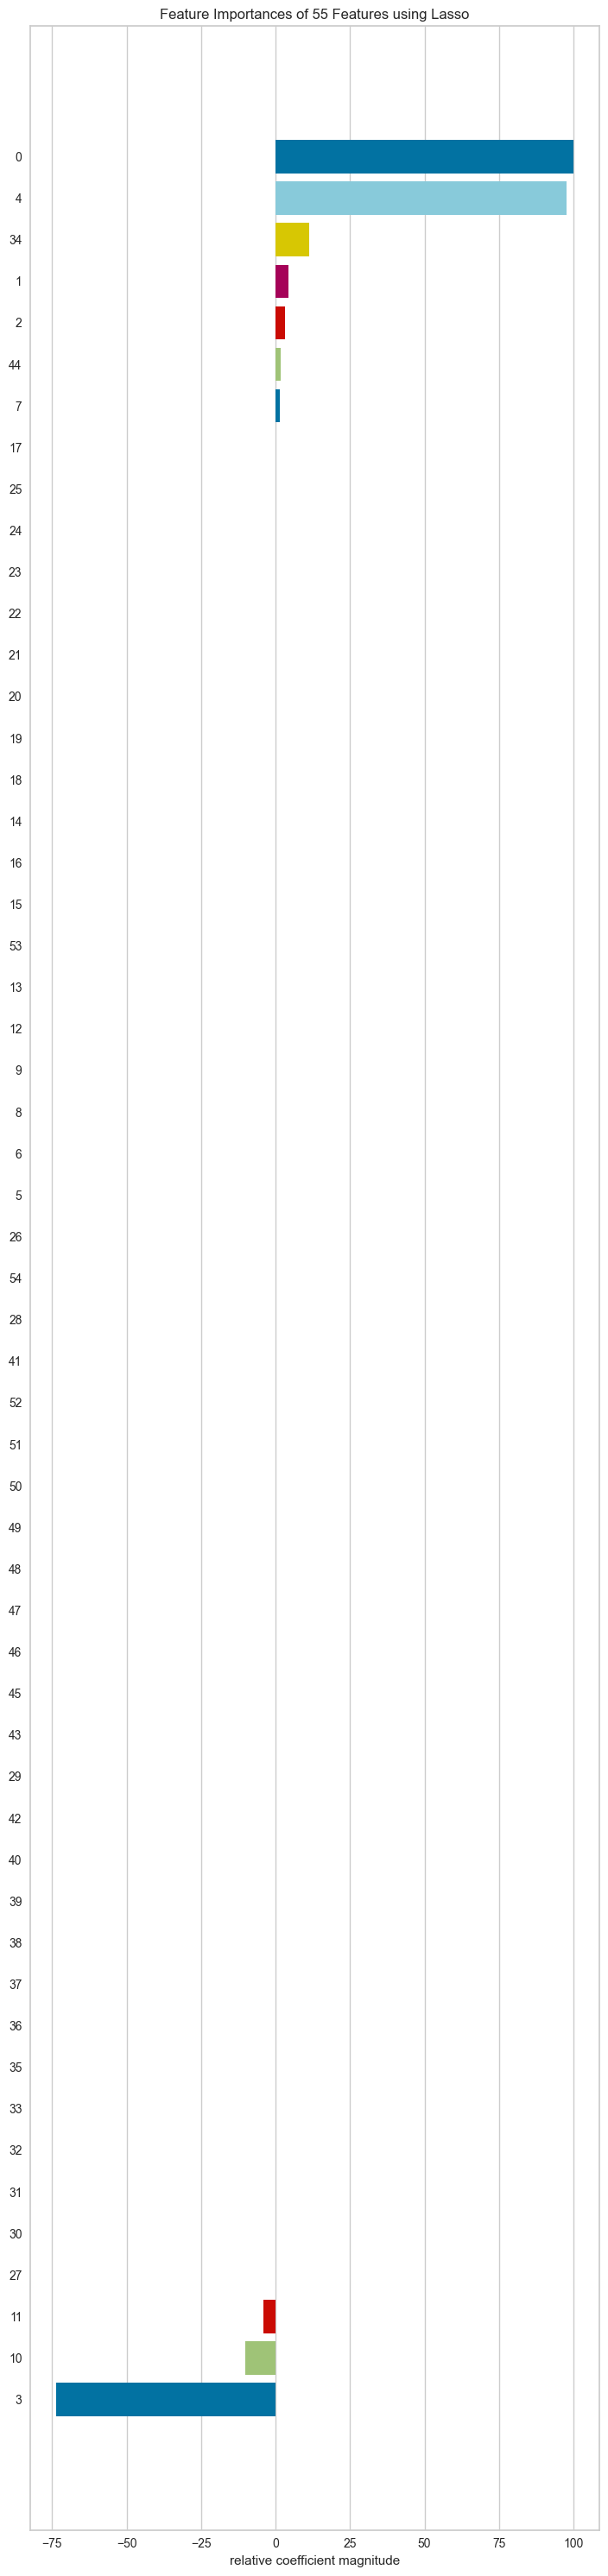

In [127]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# Model with alpha=0.01 hyperparameter, which gives the best score for the Lasso model FeatureImportances
# into the function. we give the columns names of df as labels.

# we can do feature selection via lasso